Improved version of BaseModel #6
- Include Categorical Features with OneHotEncoding
- Improve distributions to be normal with log()
- Improve Missing Values strategy based on dataset description (more careful)
- Manual outlier detection (more careful) 
- Added references to works of others

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [205]:
train = pd.read_csv("./dataset/train.csv")
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [206]:
train.shape

(1460, 81)

# PreProcessing

Sources on EDA and PreProcessing:

- https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python 


In [207]:
train.drop(['Id'], axis=1, inplace=True)
train.shape

(1460, 80)

## Inspecting Numerical Features

I will go through all numerical features in dataset

For each of the feature I will draw its distribution for two reasons:
1. To check Skewness
2. To check Kurtosisness

And will draw normal probability plot for the reasons:
1. To check if the distribution is normal
2. To locate outliers that are very far from distribution

Then, I will draw the same two Figures for the same feature but wil passing it through log():
1. To check if normality/skewness will be improved with this trick

In [208]:
def plot_feature_distribution(feature, col):
    """ Shows feature distribution to analyse if it needs normalization """
    
    #skewness and kurtosis
    print("Skewness: %f" % feature.skew())
    print("Kurtosis: %f" % feature.kurt())
    
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    sns.histplot(feature, kde=True);
    plt.title("{} Distribution".format(col))
    plt.subplot(122)
    stats.probplot(feature, plot=plt)
    plt.show()
    
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    sns.histplot(np.log1p(feature), kde=True);
    plt.title("{} Distribution after Log1p()".format(col))
    plt.subplot(122)
    stats.probplot(np.log1p(feature), plot=plt)
    plt.show()

In [209]:
def show_all_features():
    numerical_features = train.select_dtypes(exclude="object").columns
    for ind, col in enumerate(numerical_features):
        feature = train[col]
        print("Feature #{}: {}".format(ind, col))
        plot_feature_distribution(feature, col)

Feature #0: MSSubClass
Skewness: 1.407657
Kurtosis: 1.580188


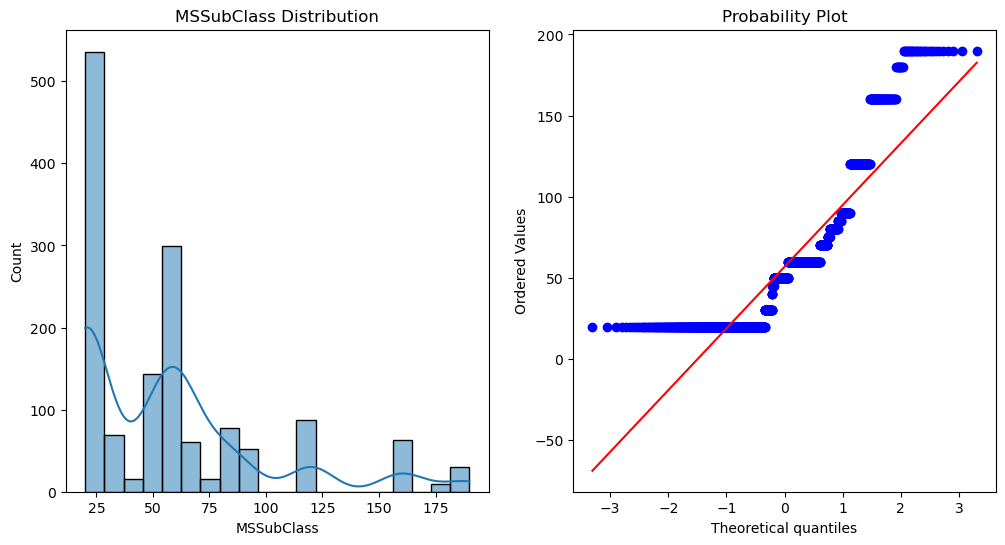

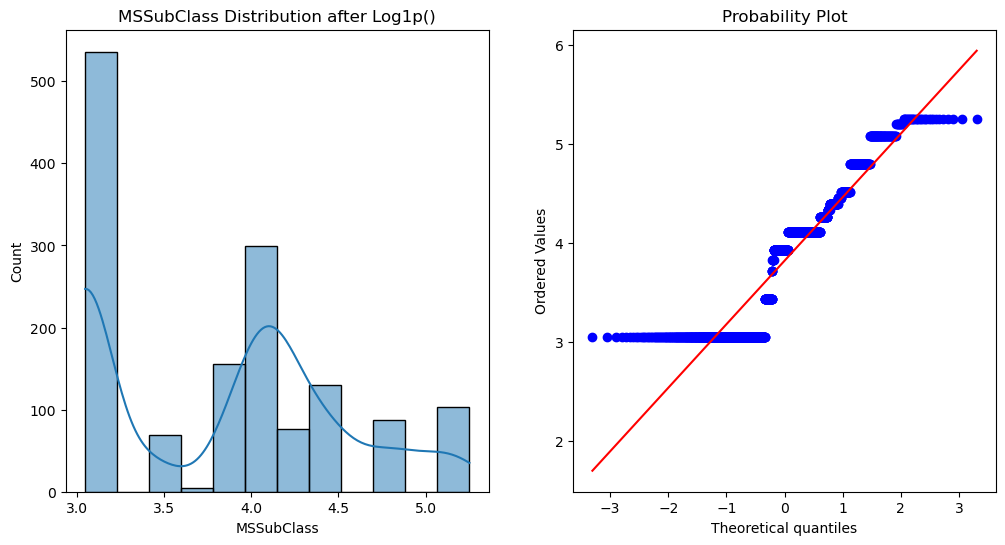

Feature #1: LotFrontage
Skewness: 2.163569
Kurtosis: 17.452867


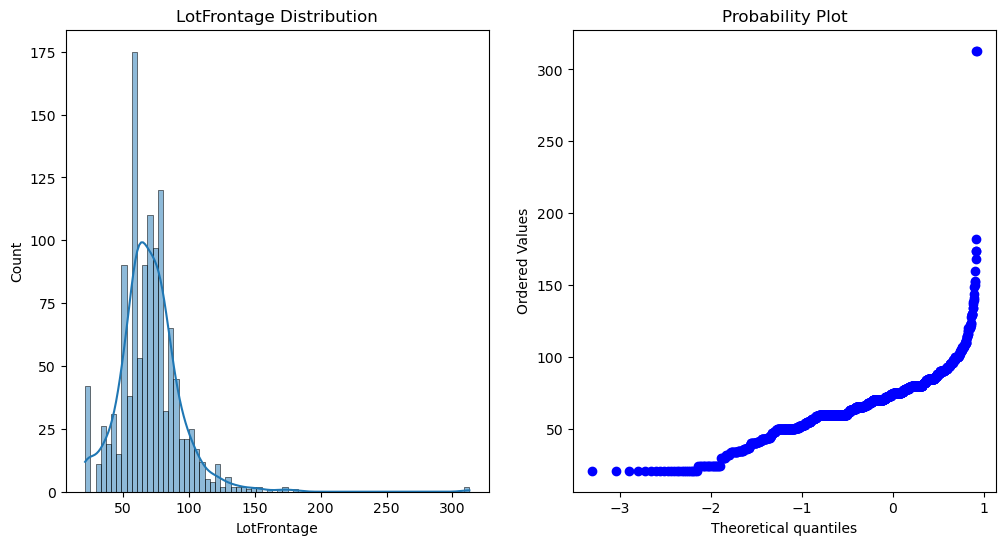

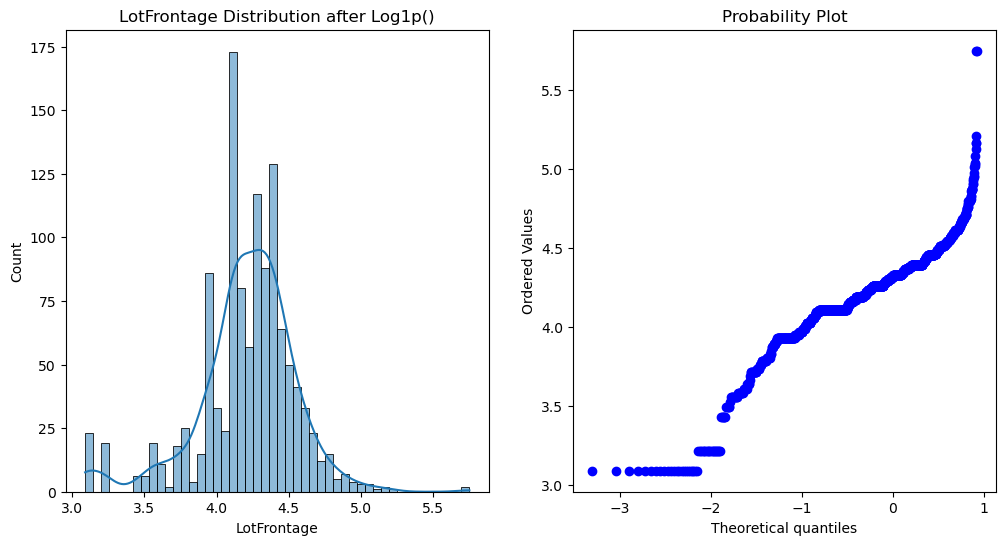

Feature #2: LotArea
Skewness: 12.207688
Kurtosis: 203.243271


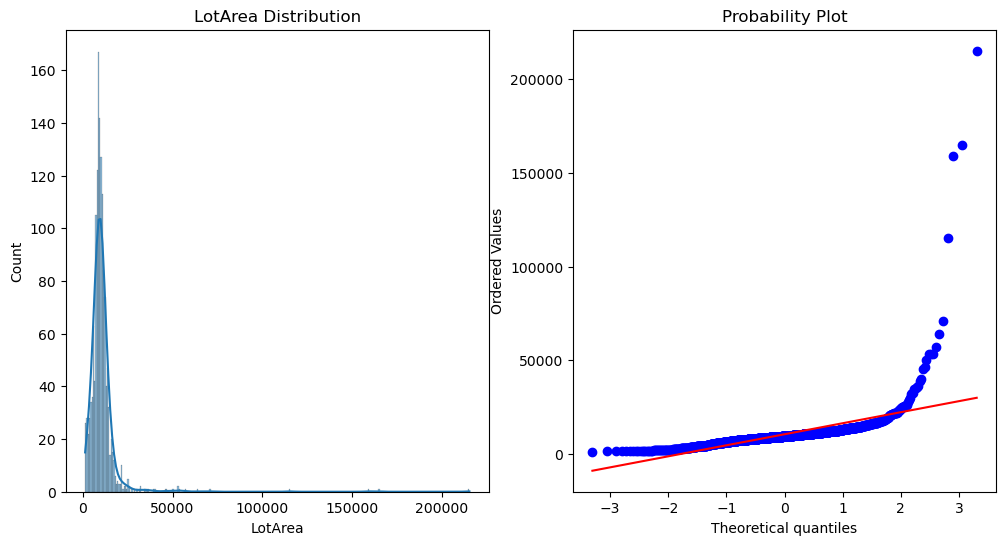

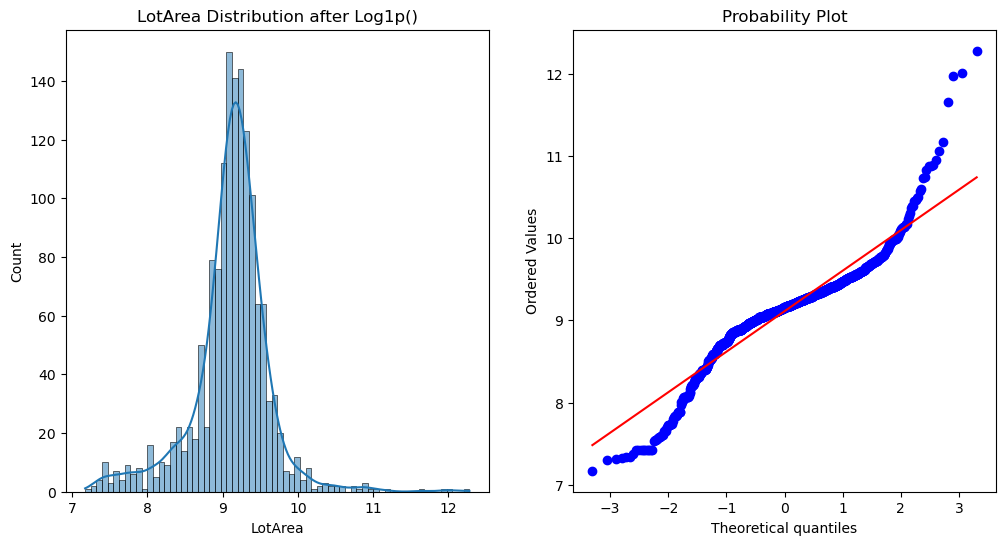

Feature #3: OverallQual
Skewness: 0.216944
Kurtosis: 0.096293


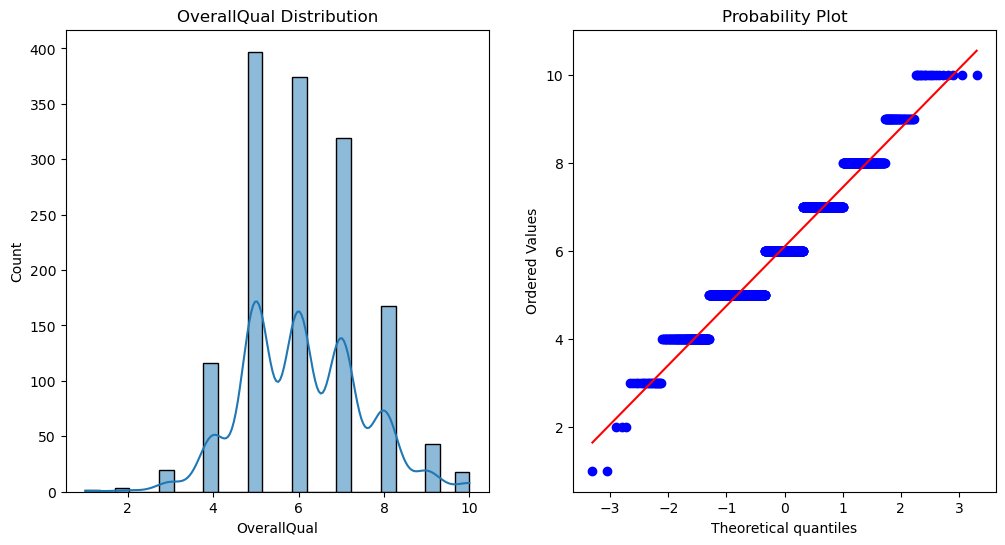

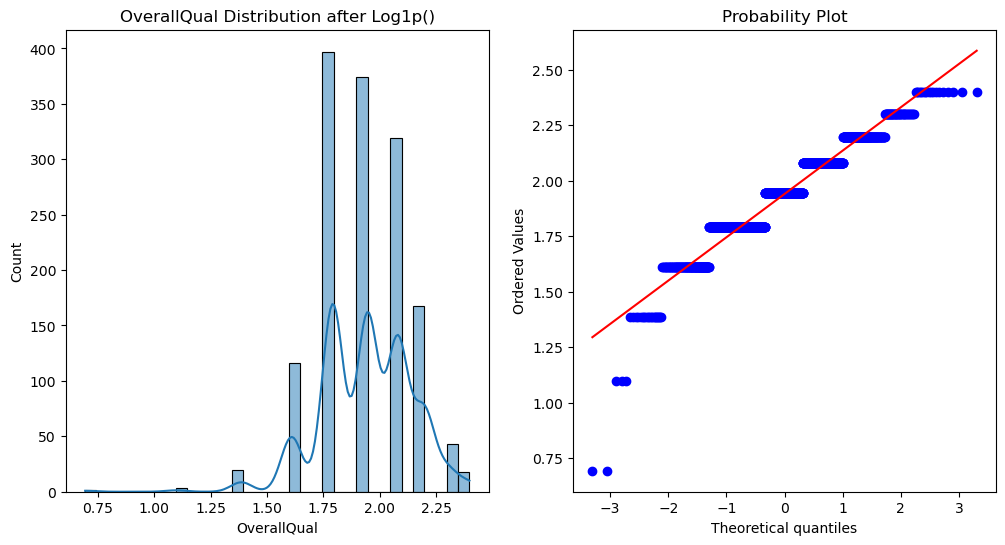

Feature #4: OverallCond
Skewness: 0.693067
Kurtosis: 1.106413


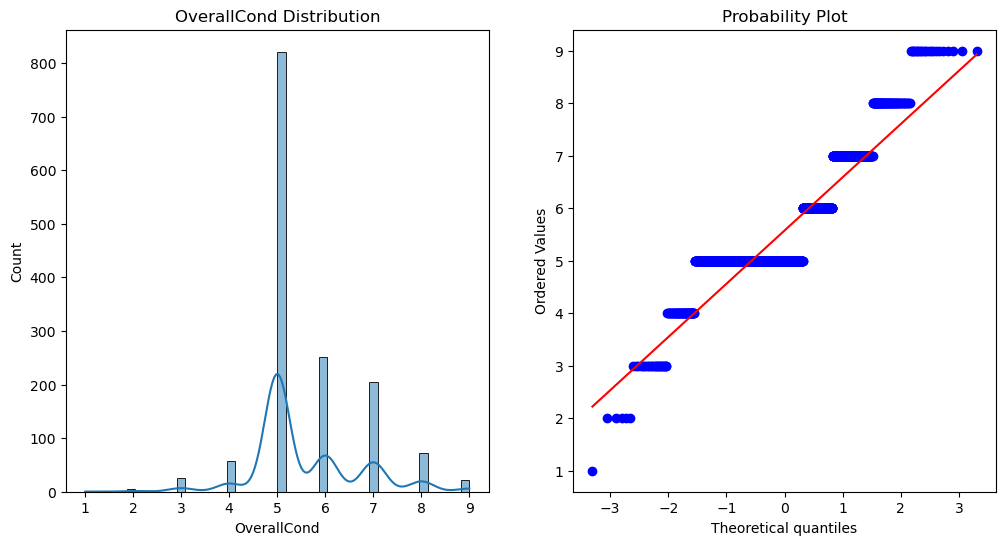

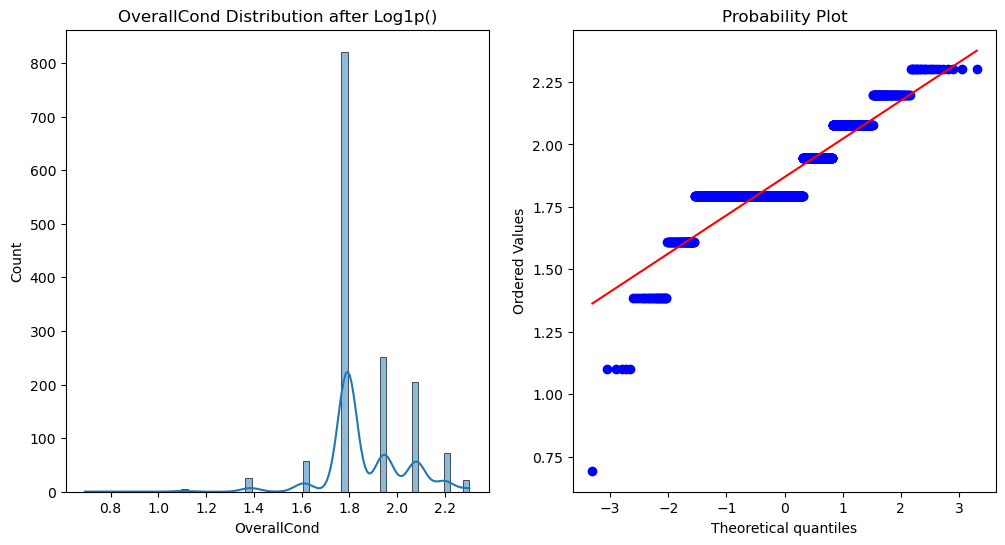

Feature #5: YearBuilt
Skewness: -0.613461
Kurtosis: -0.439552


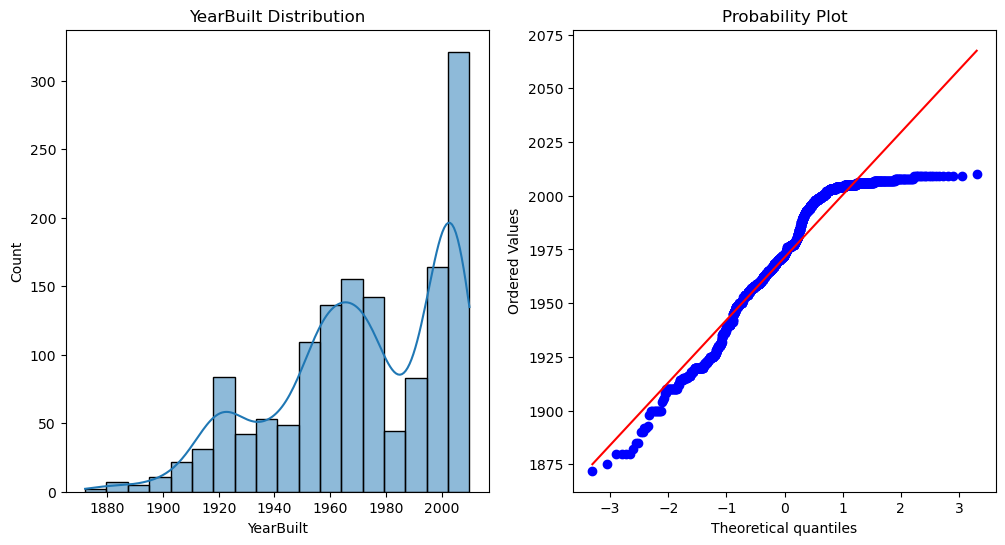

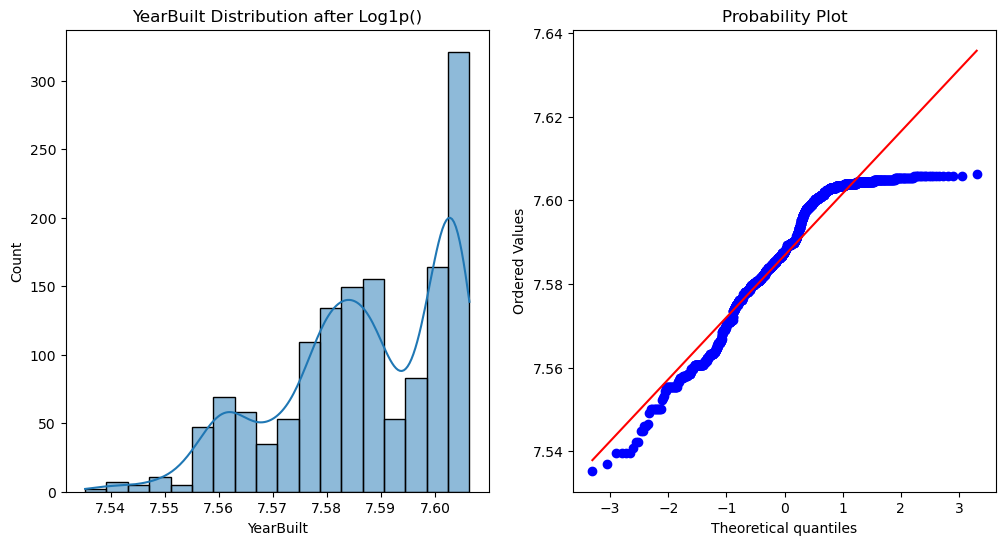

Feature #6: YearRemodAdd
Skewness: -0.503562
Kurtosis: -1.272245


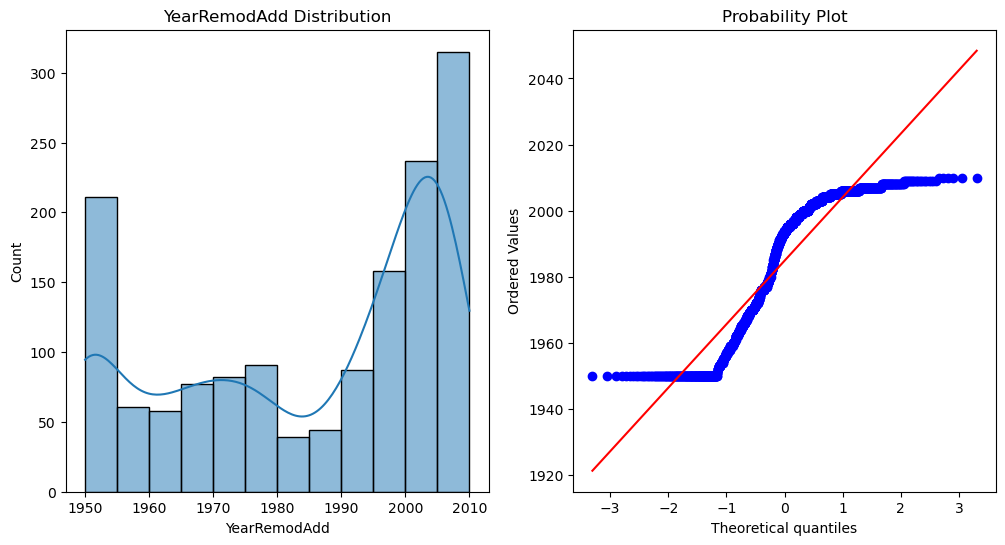

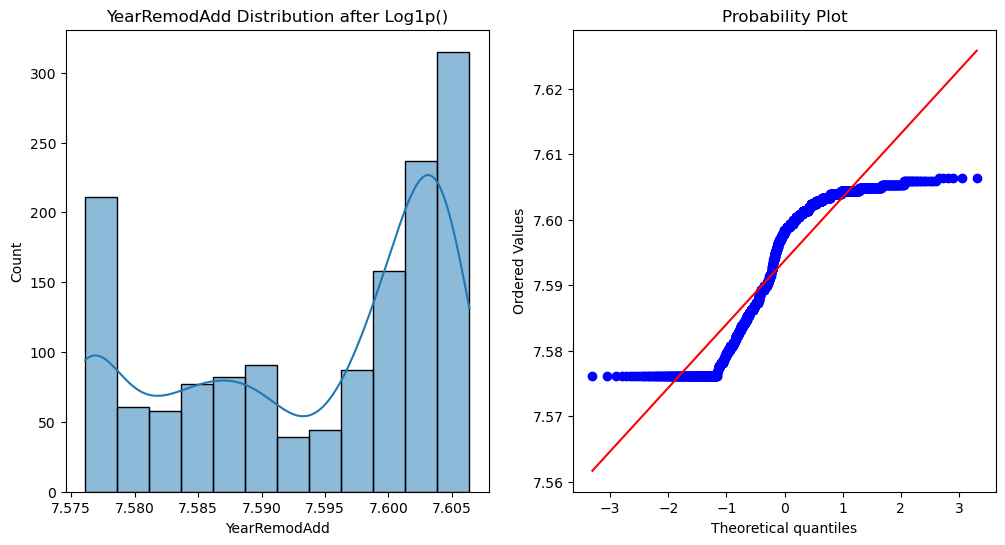

Feature #7: MasVnrArea
Skewness: 2.669084
Kurtosis: 10.082417


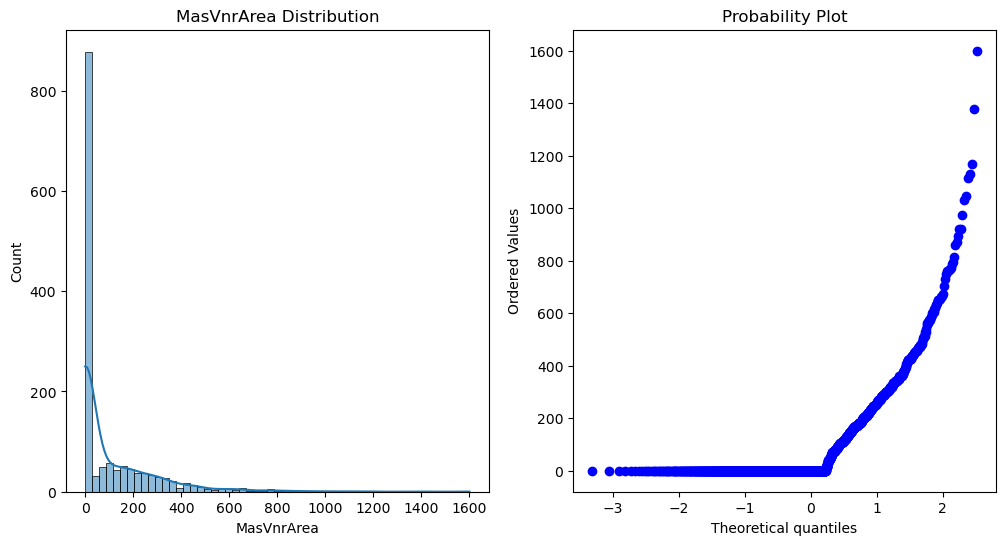

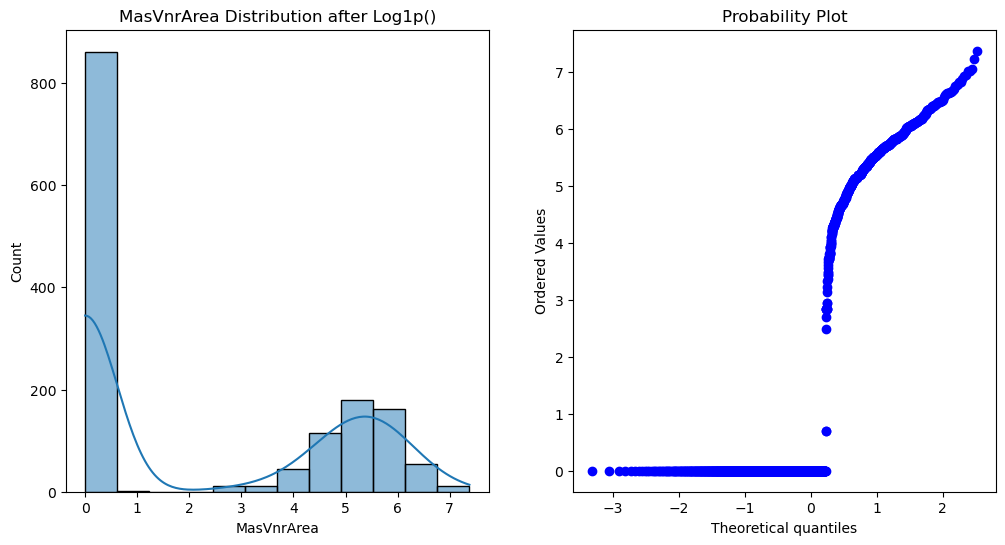

Feature #8: BsmtFinSF1
Skewness: 1.685503
Kurtosis: 11.118236


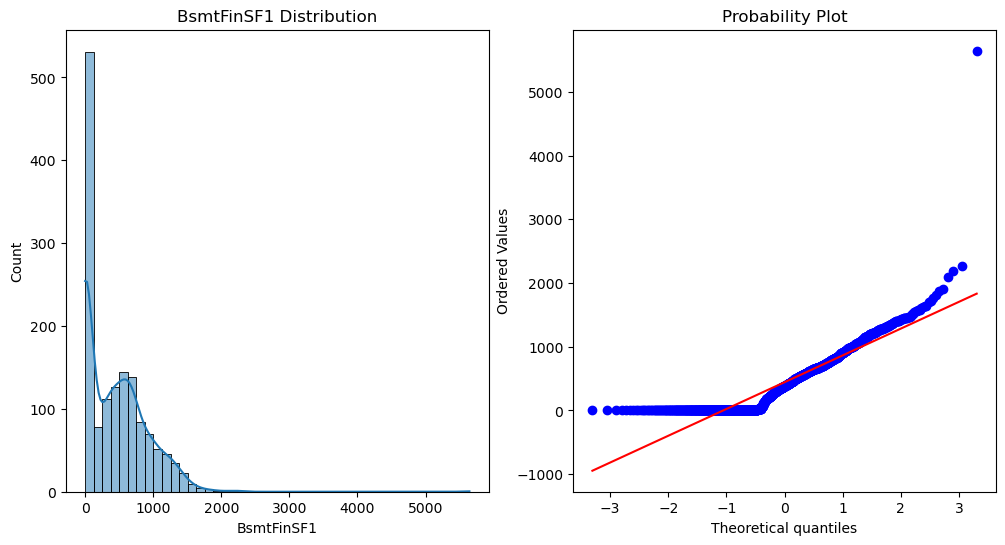

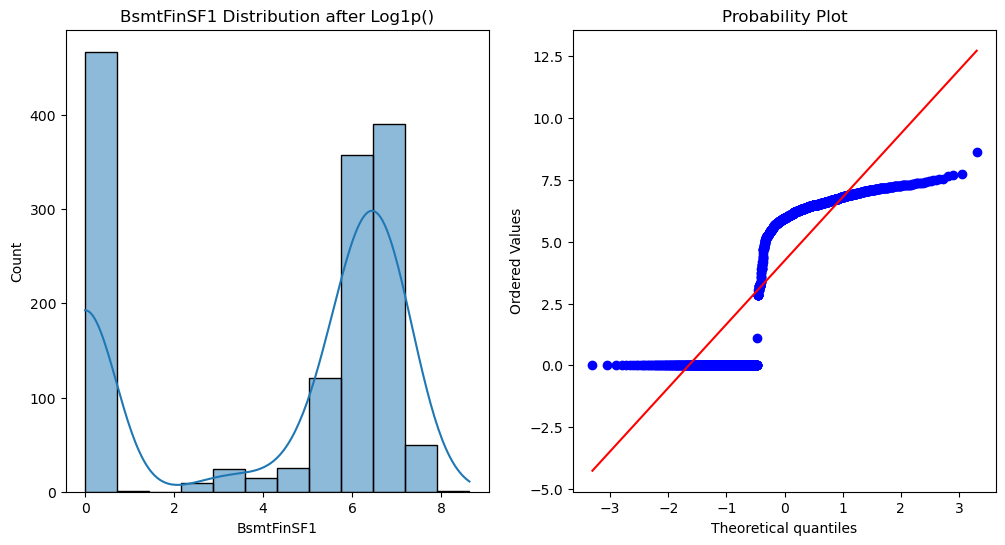

Feature #9: BsmtFinSF2
Skewness: 4.255261
Kurtosis: 20.113338


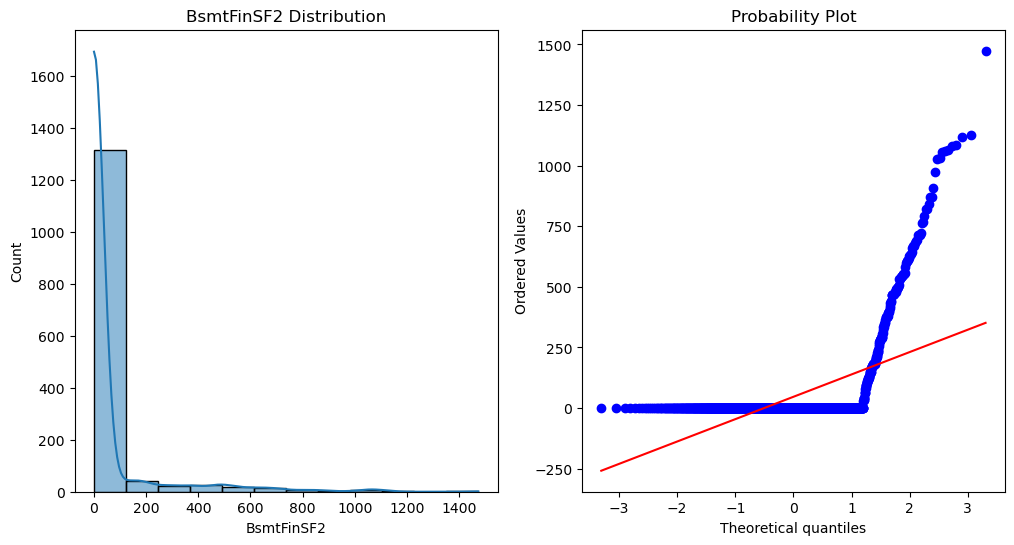

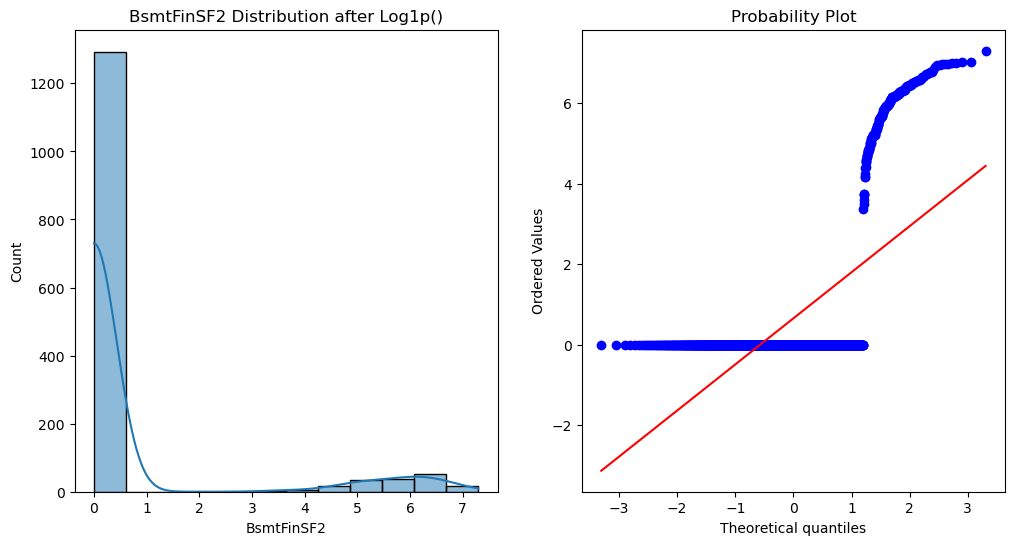

Feature #10: BsmtUnfSF
Skewness: 0.920268
Kurtosis: 0.474994


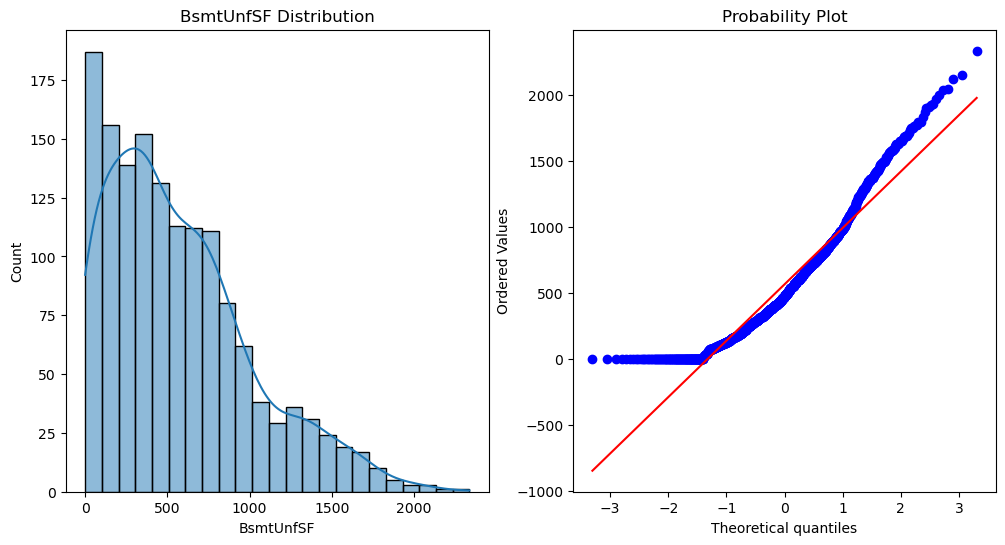

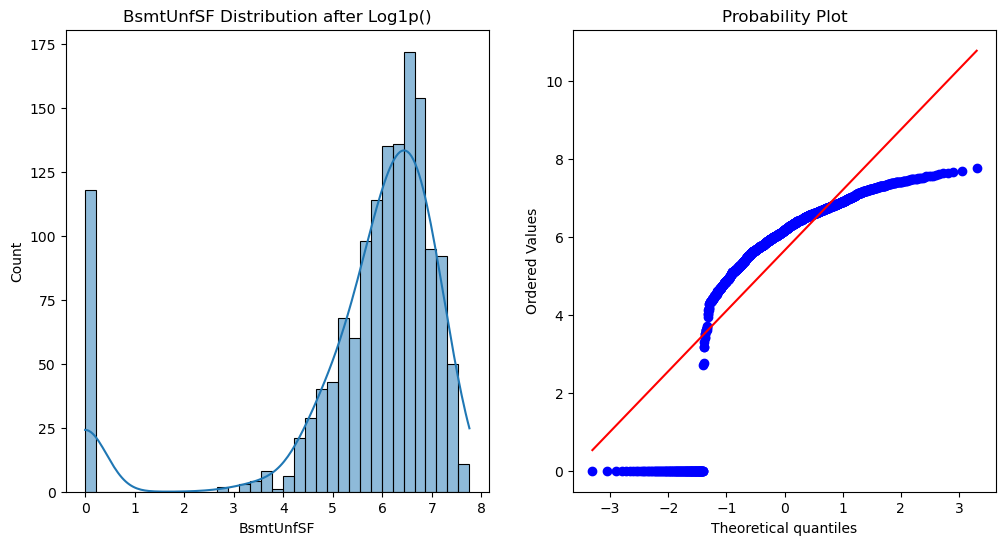

Feature #11: TotalBsmtSF
Skewness: 1.524255
Kurtosis: 13.250483


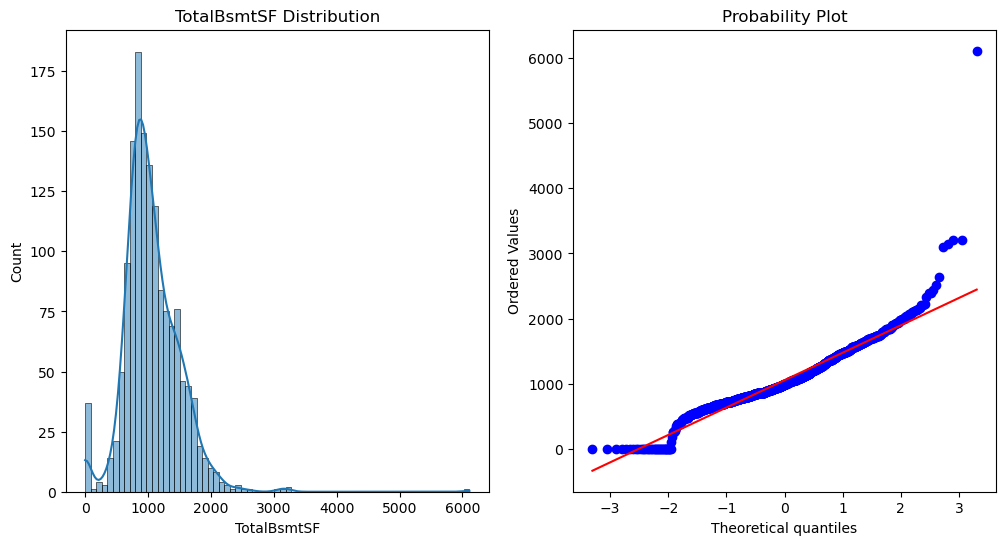

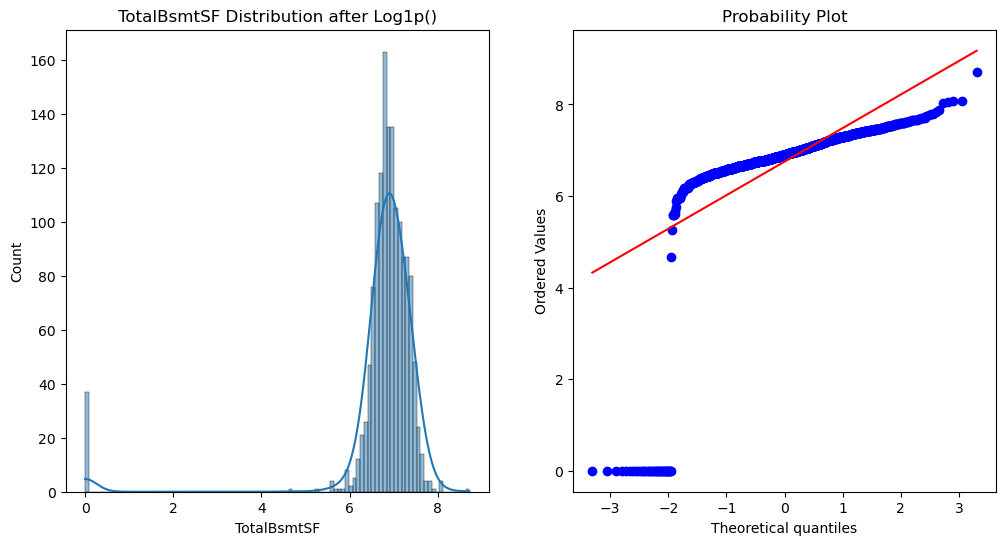

Feature #12: 1stFlrSF
Skewness: 1.376757
Kurtosis: 5.745841


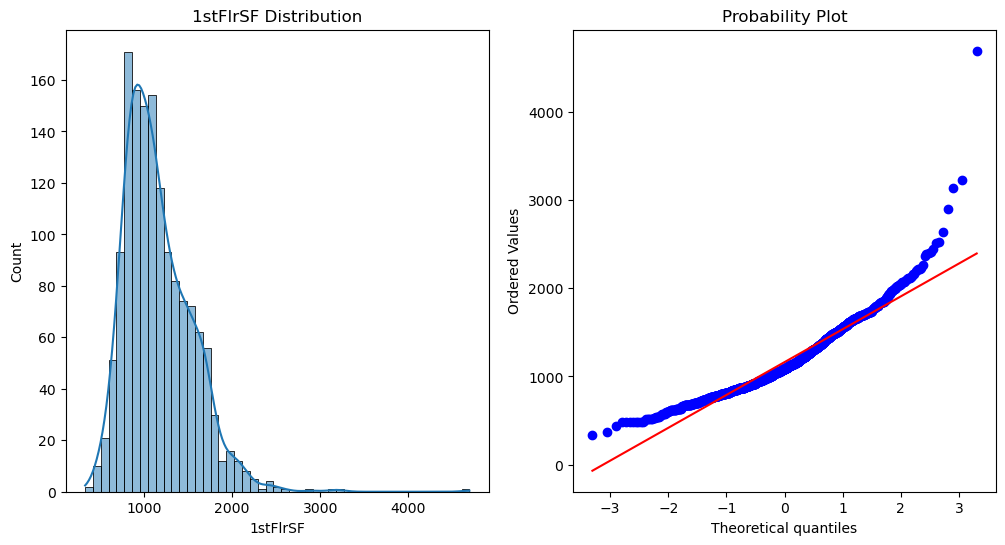

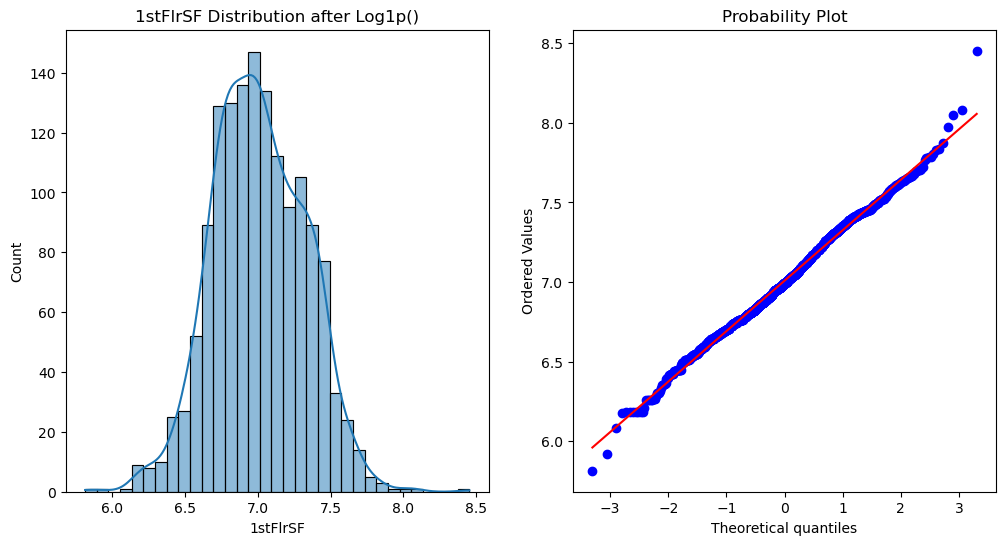

Feature #13: 2ndFlrSF
Skewness: 0.813030
Kurtosis: -0.553464


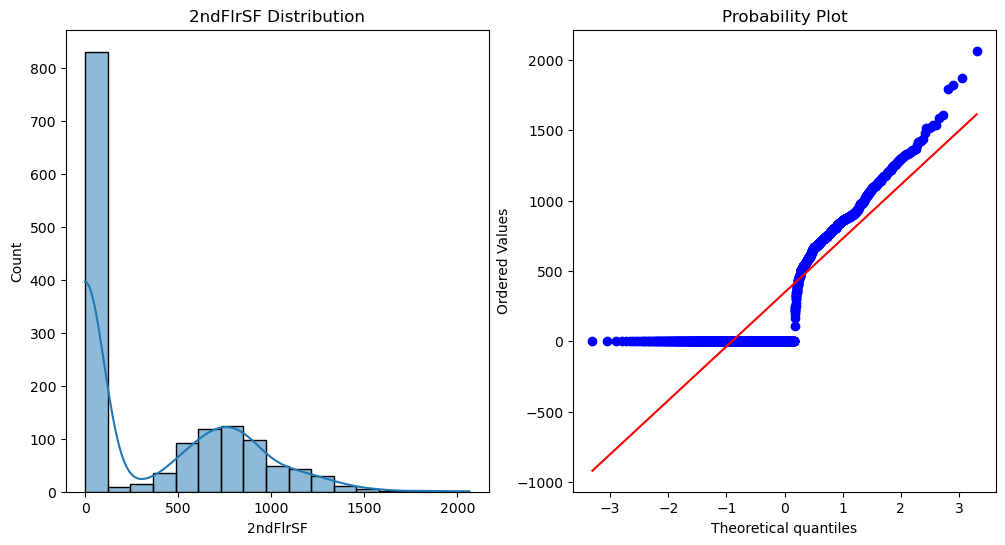

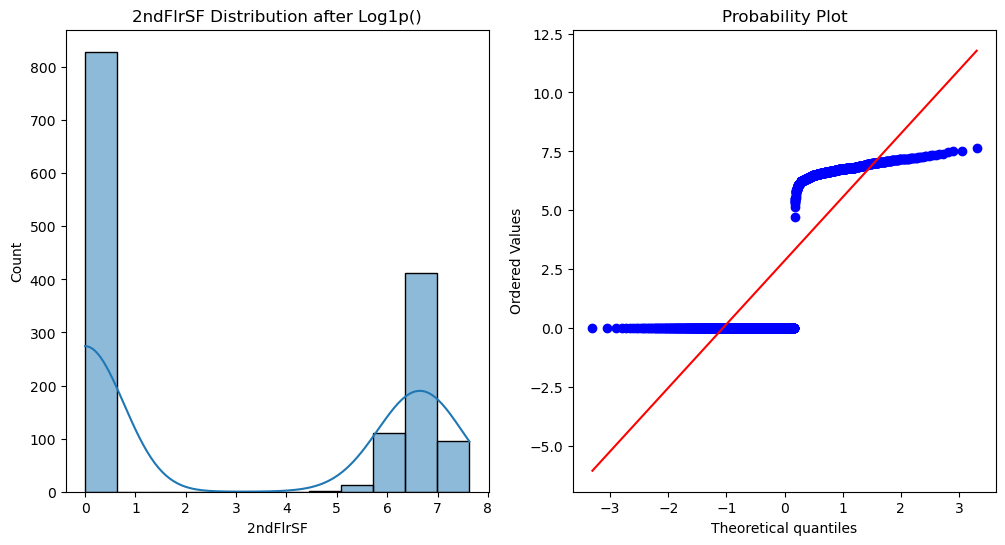

Feature #14: LowQualFinSF
Skewness: 9.011341
Kurtosis: 83.234817


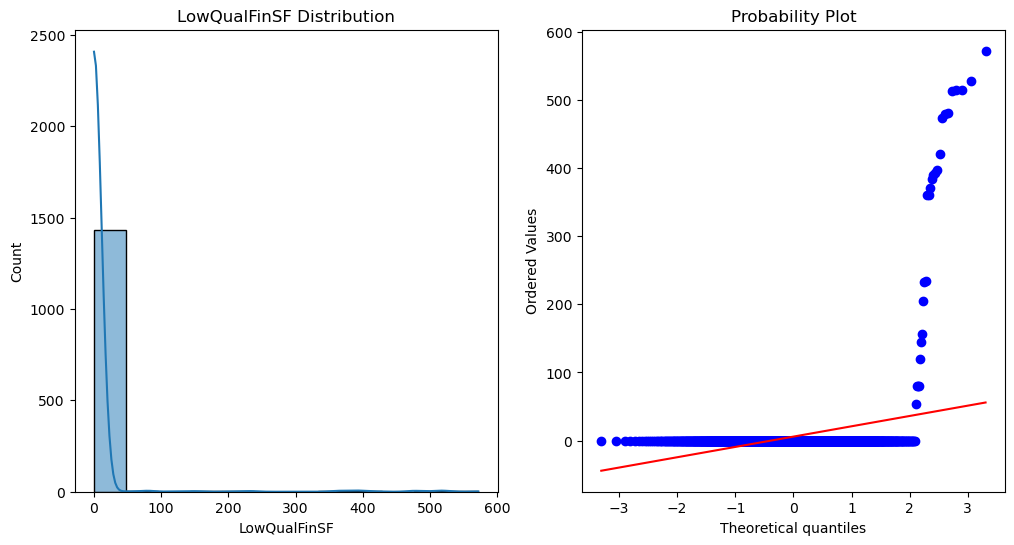

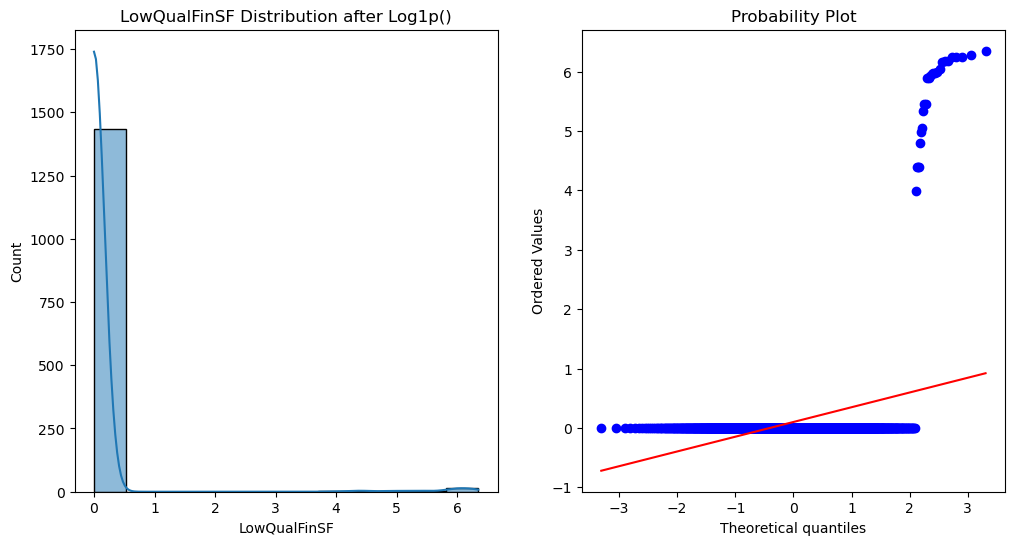

Feature #15: GrLivArea
Skewness: 1.366560
Kurtosis: 4.895121


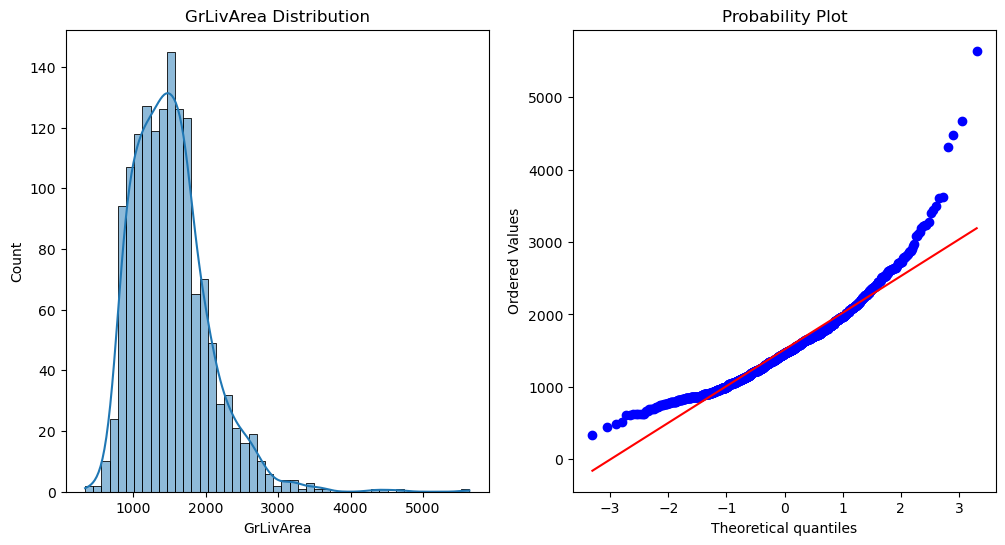

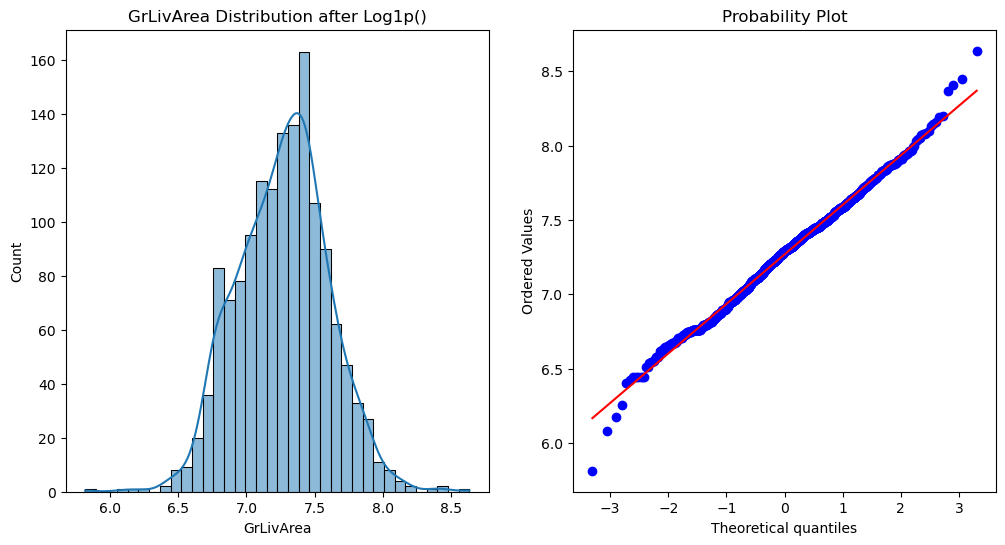

Feature #16: BsmtFullBath
Skewness: 0.596067
Kurtosis: -0.839098


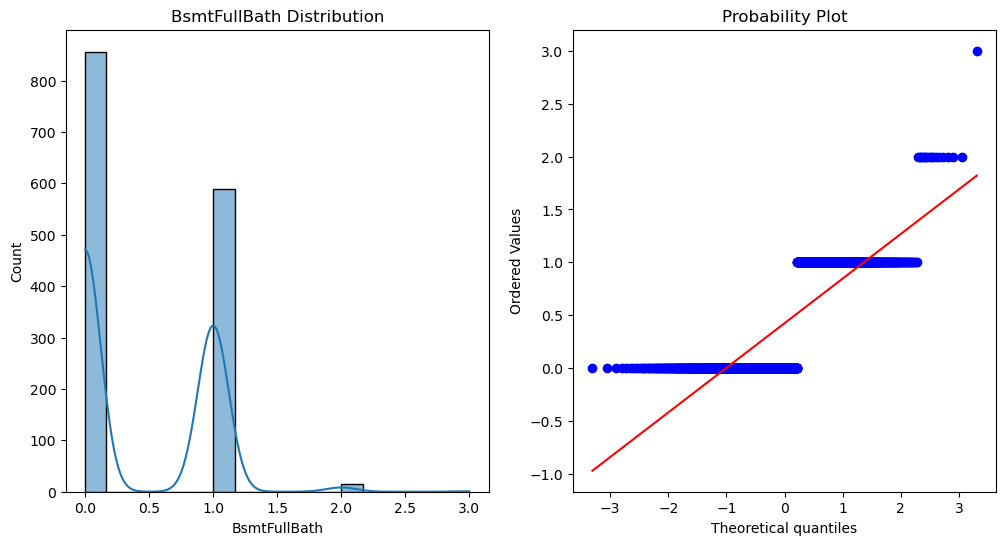

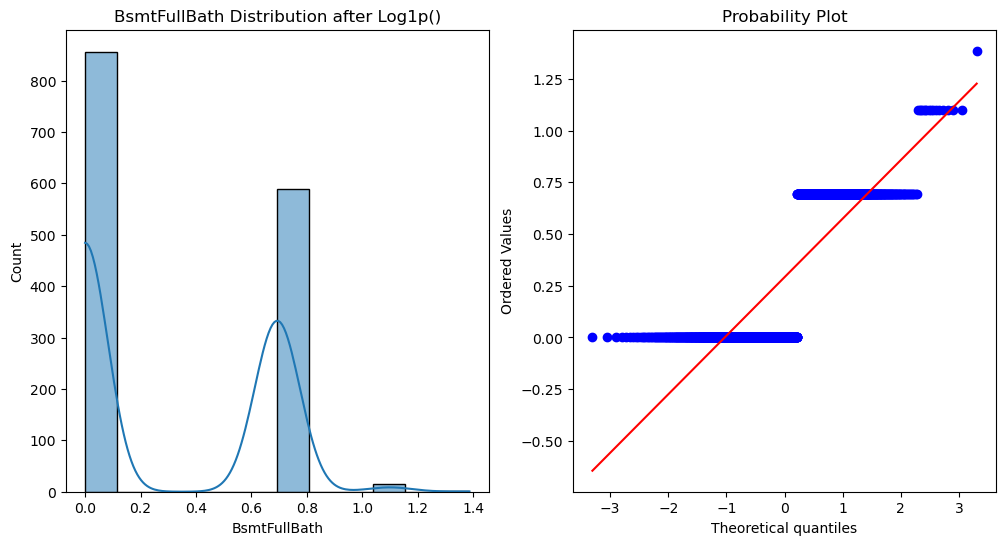

Feature #17: BsmtHalfBath
Skewness: 4.103403
Kurtosis: 16.396642


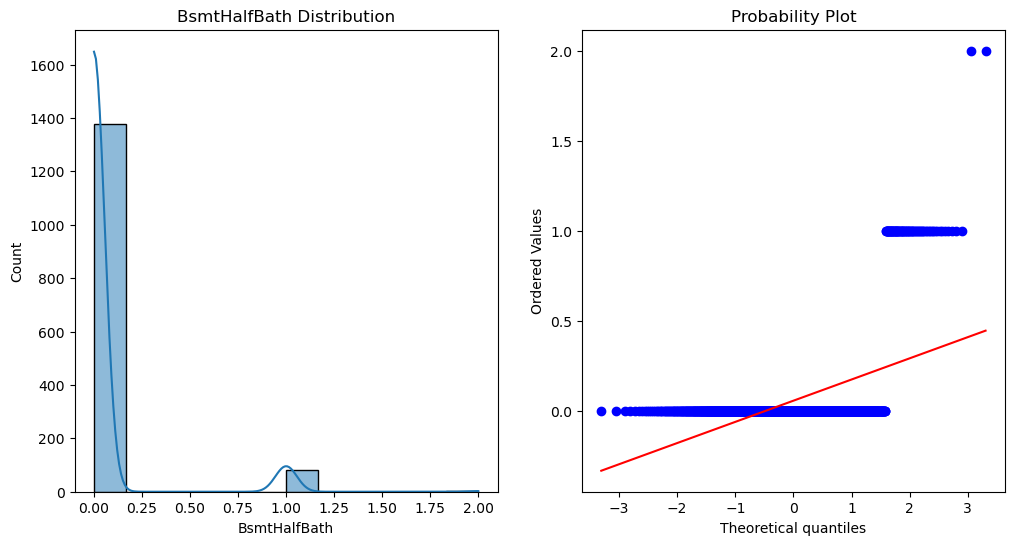

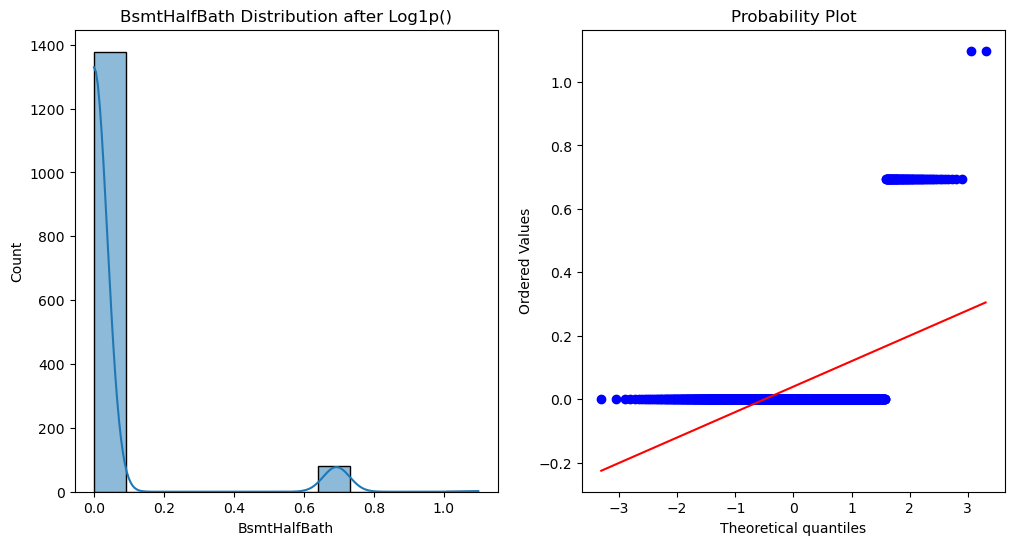

Feature #18: FullBath
Skewness: 0.036562
Kurtosis: -0.857043


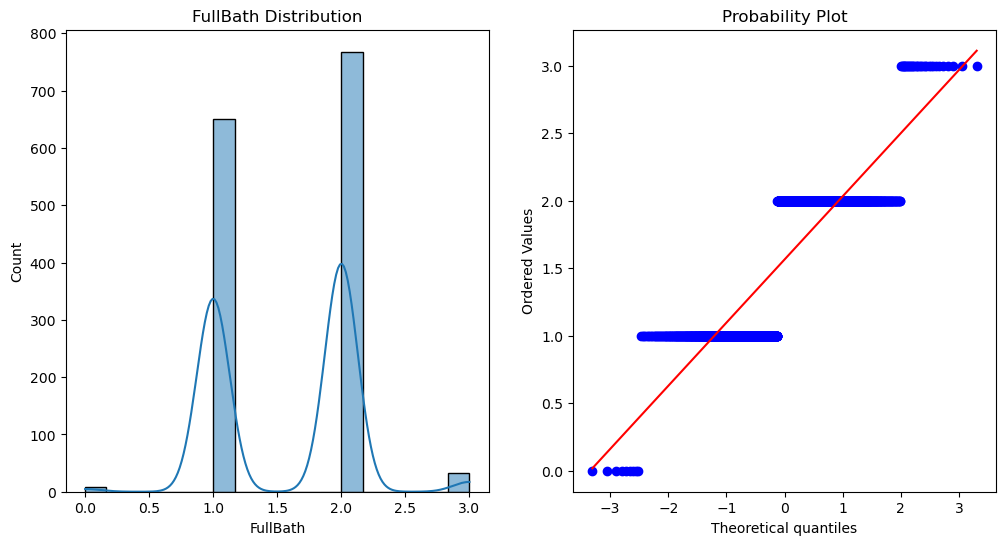

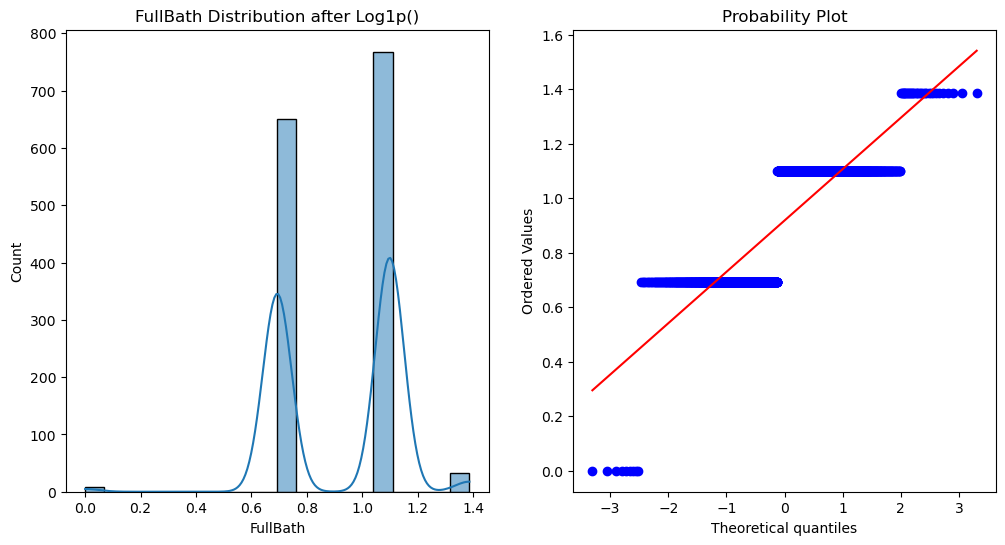

Feature #19: HalfBath
Skewness: 0.675897
Kurtosis: -1.076927


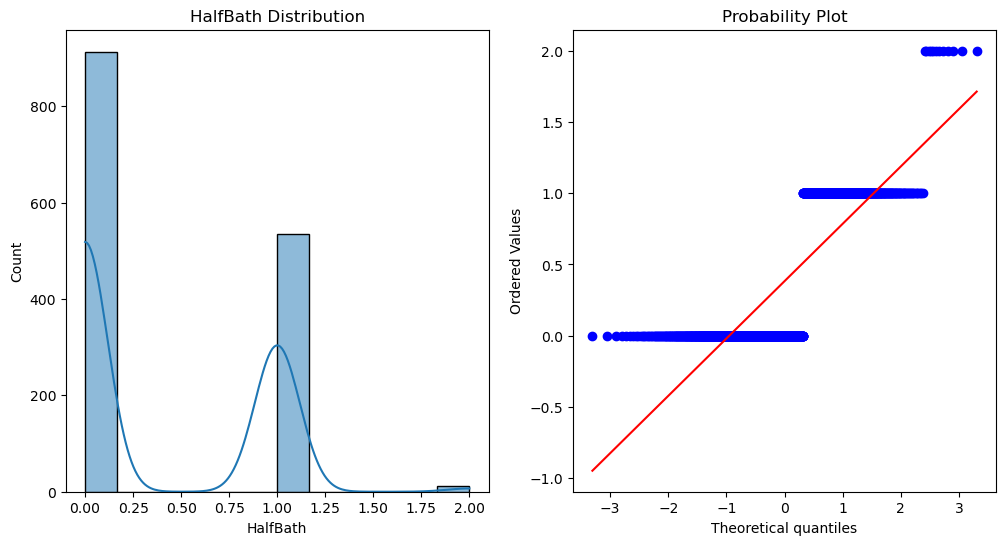

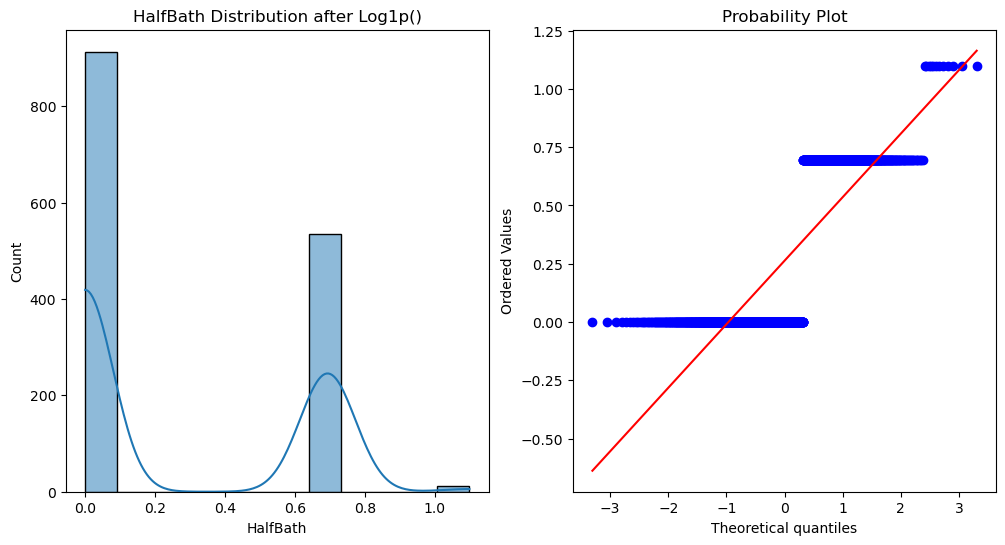

Feature #20: BedroomAbvGr
Skewness: 0.211790
Kurtosis: 2.230875


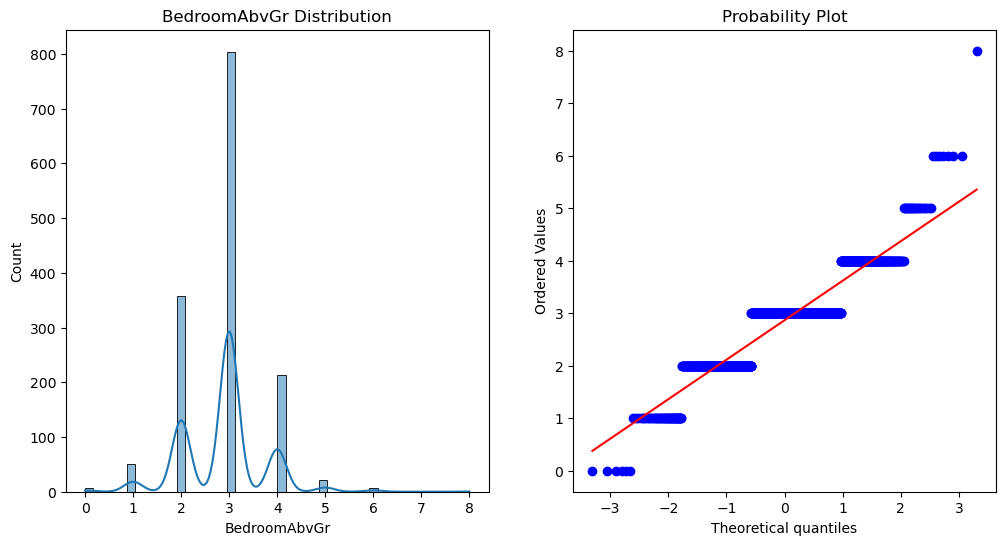

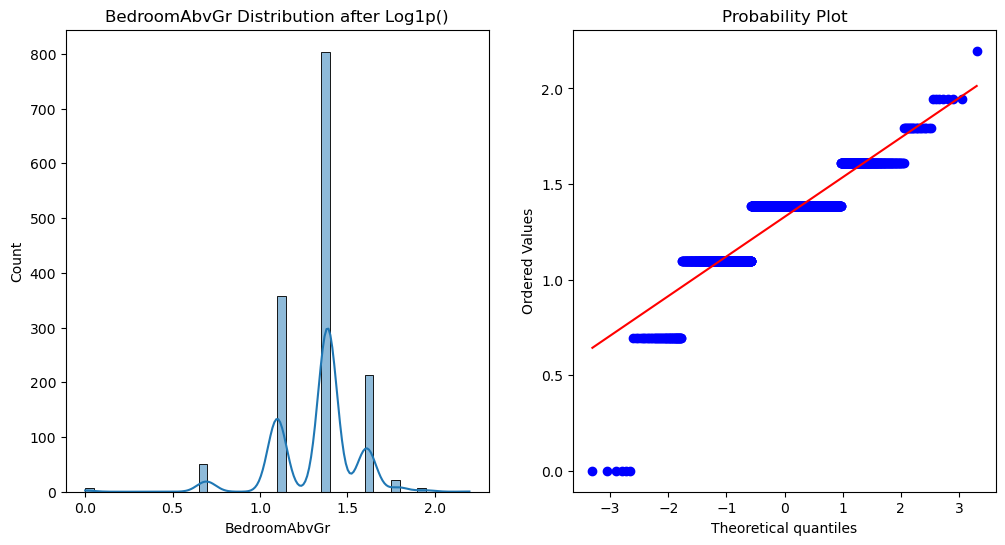

Feature #21: KitchenAbvGr
Skewness: 4.488397
Kurtosis: 21.532404


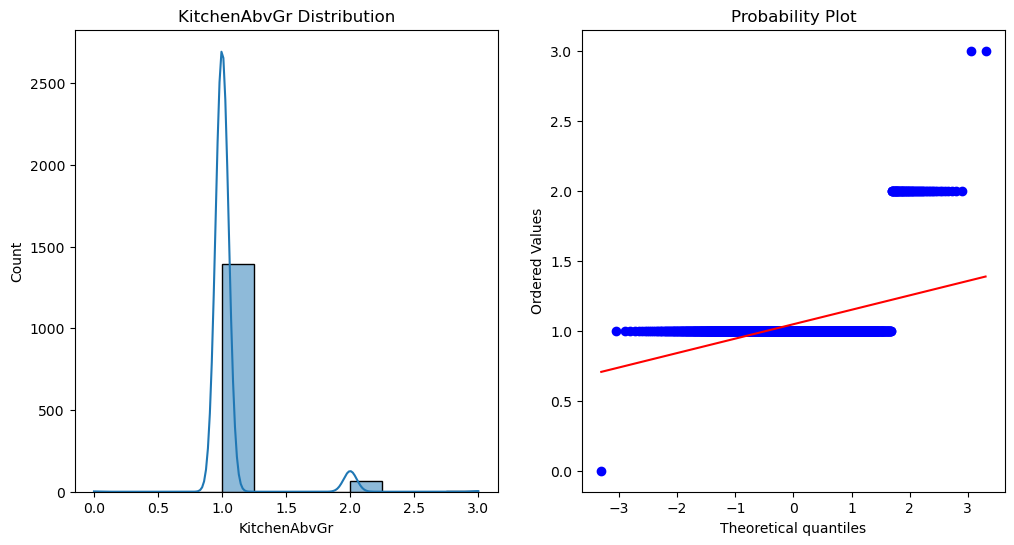

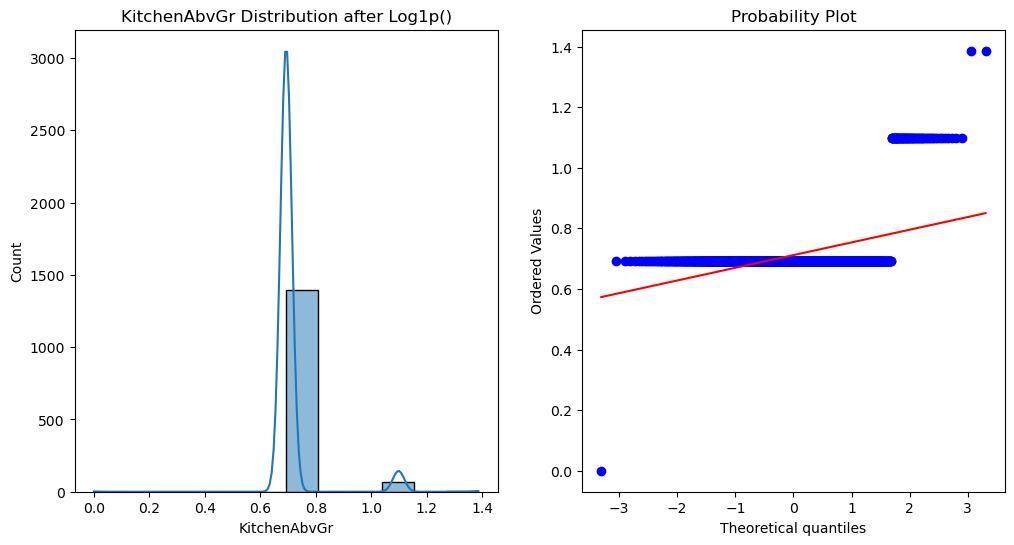

Feature #22: TotRmsAbvGrd
Skewness: 0.676341
Kurtosis: 0.880762


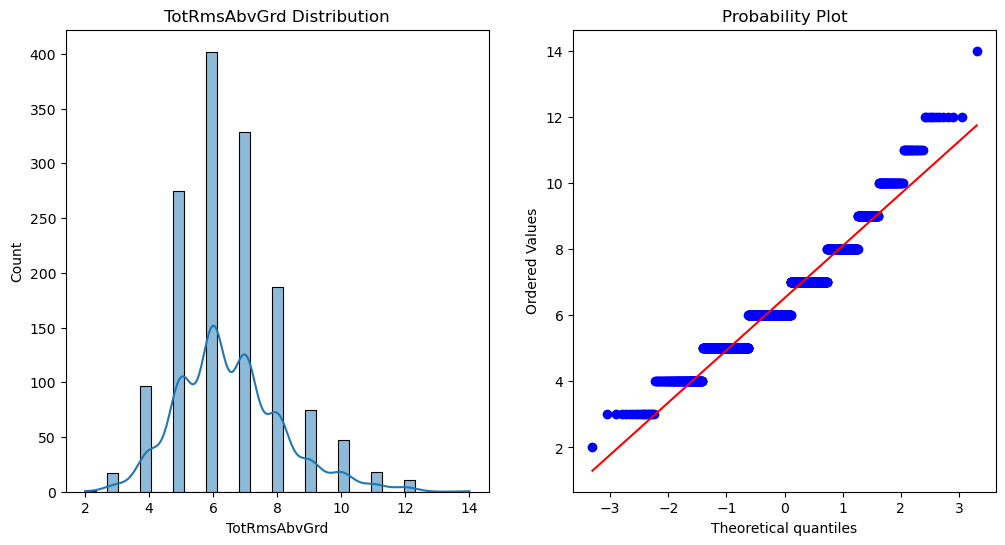

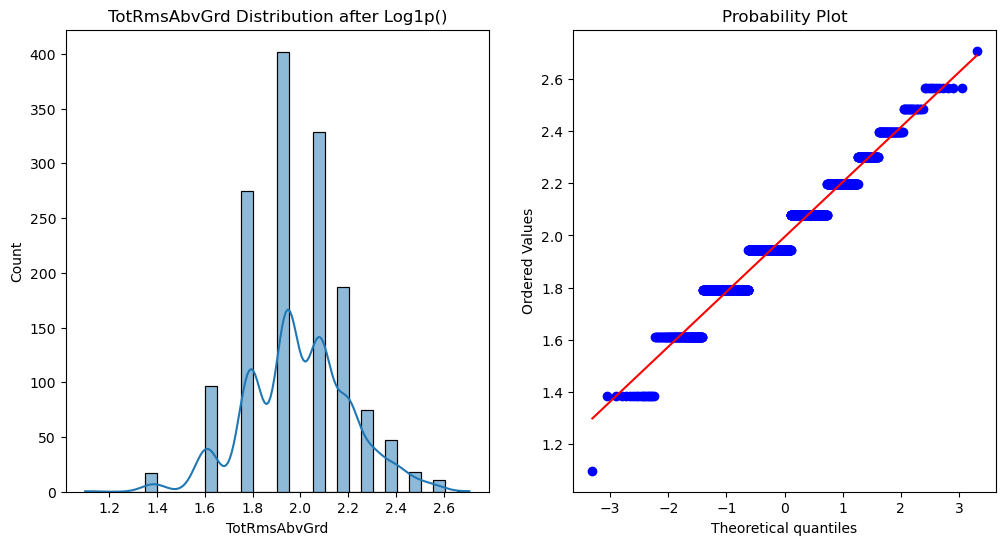

Feature #23: Fireplaces
Skewness: 0.649565
Kurtosis: -0.217237


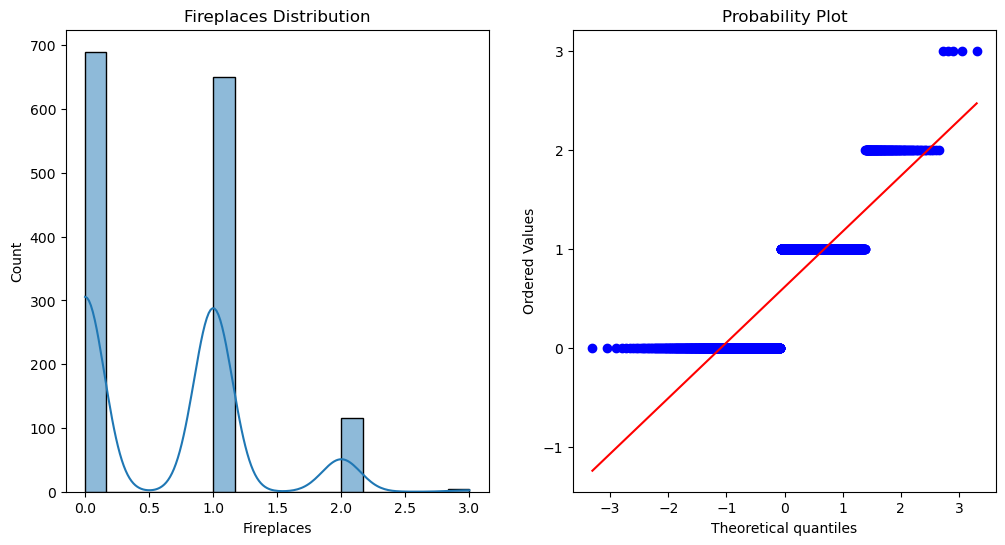

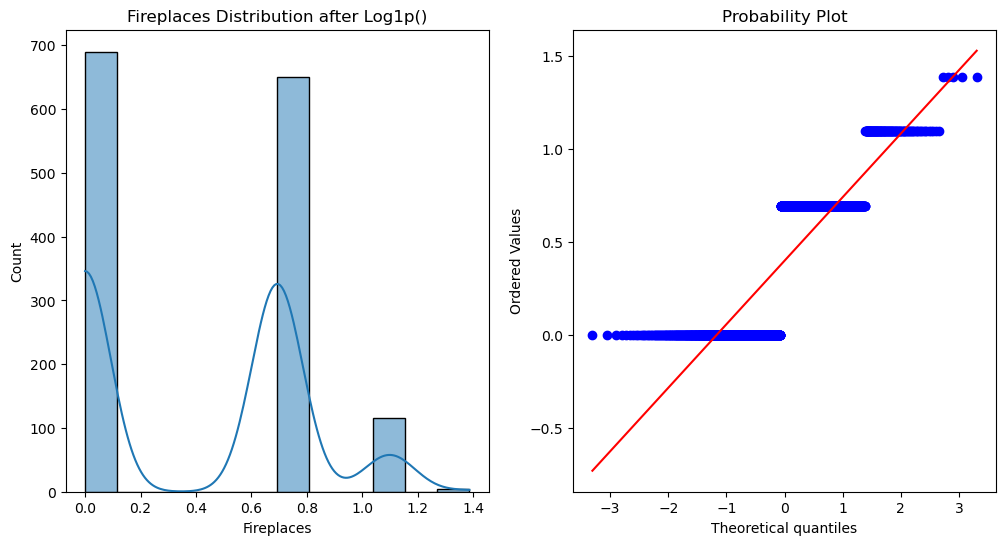

Feature #24: GarageYrBlt
Skewness: -0.649415
Kurtosis: -0.418341


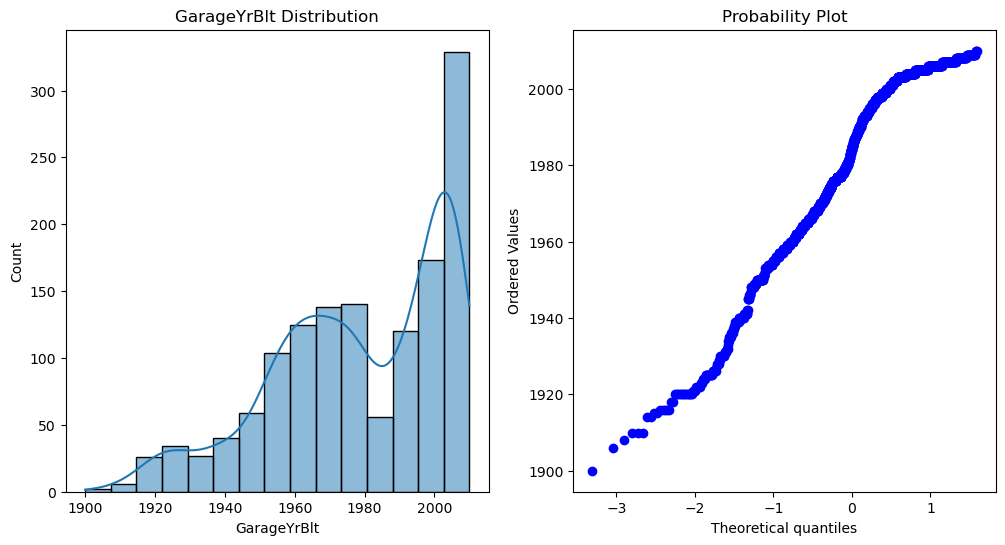

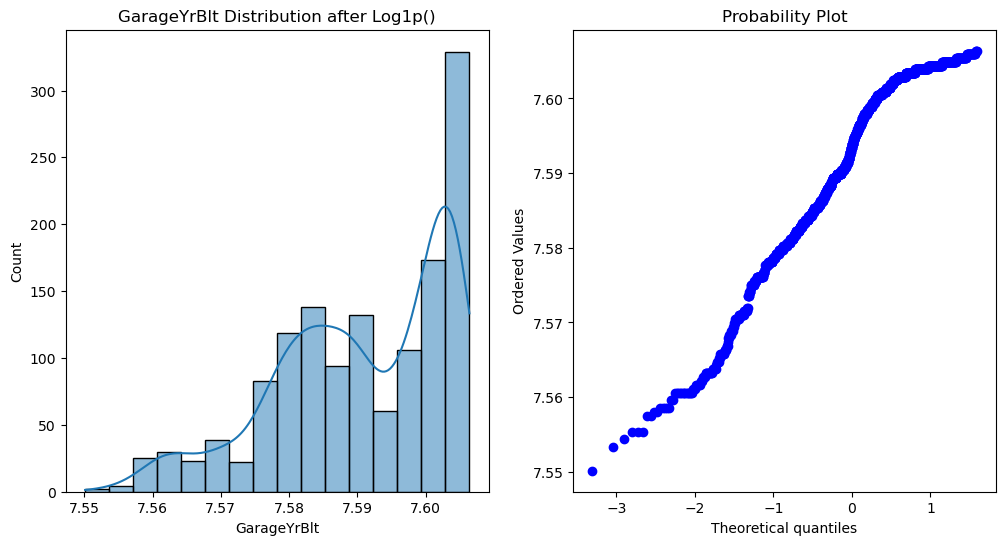

Feature #25: GarageCars
Skewness: -0.342549
Kurtosis: 0.220998


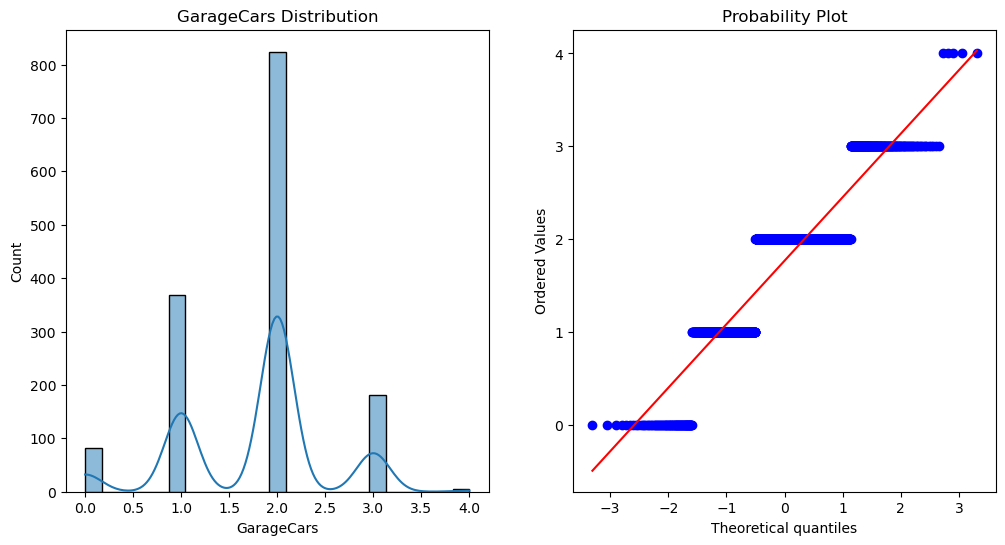

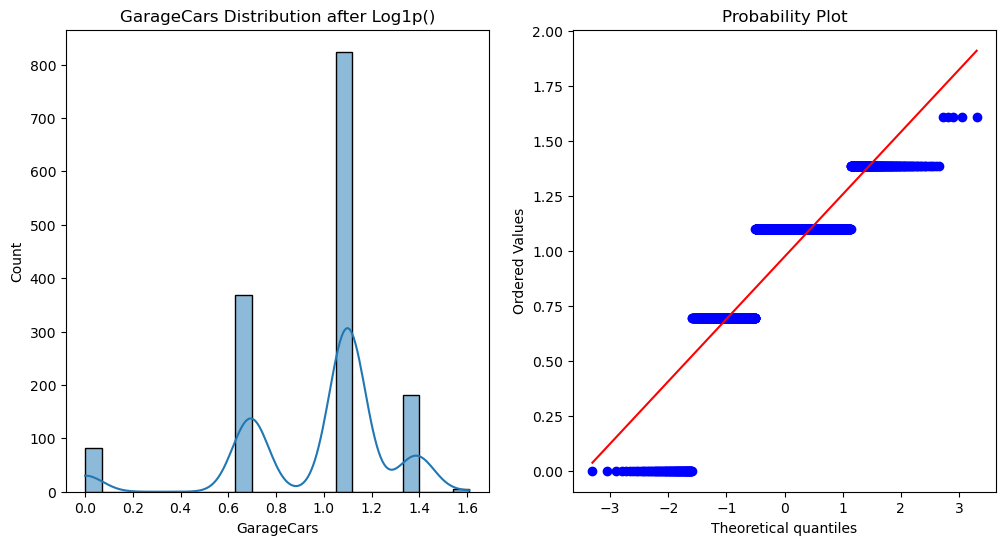

Feature #26: GarageArea
Skewness: 0.179981
Kurtosis: 0.917067


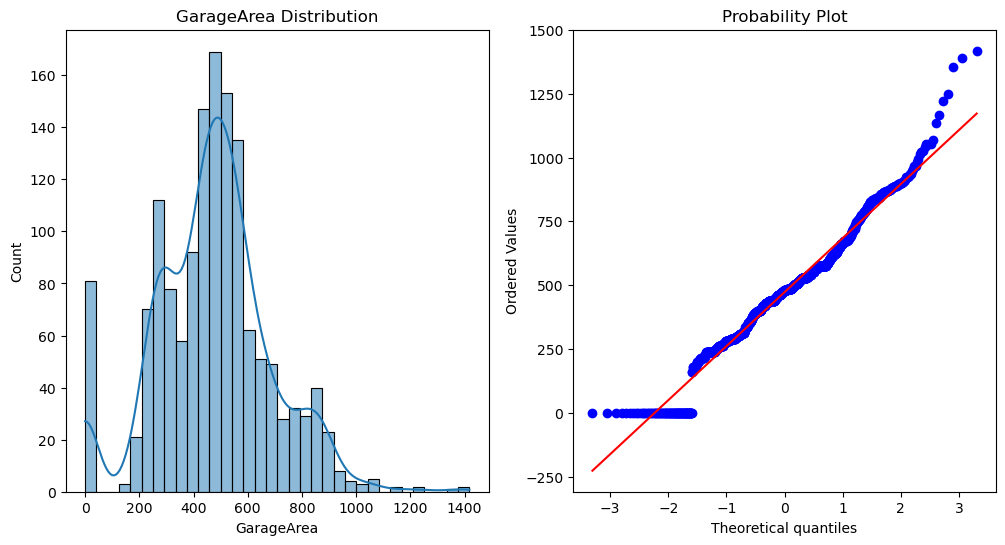

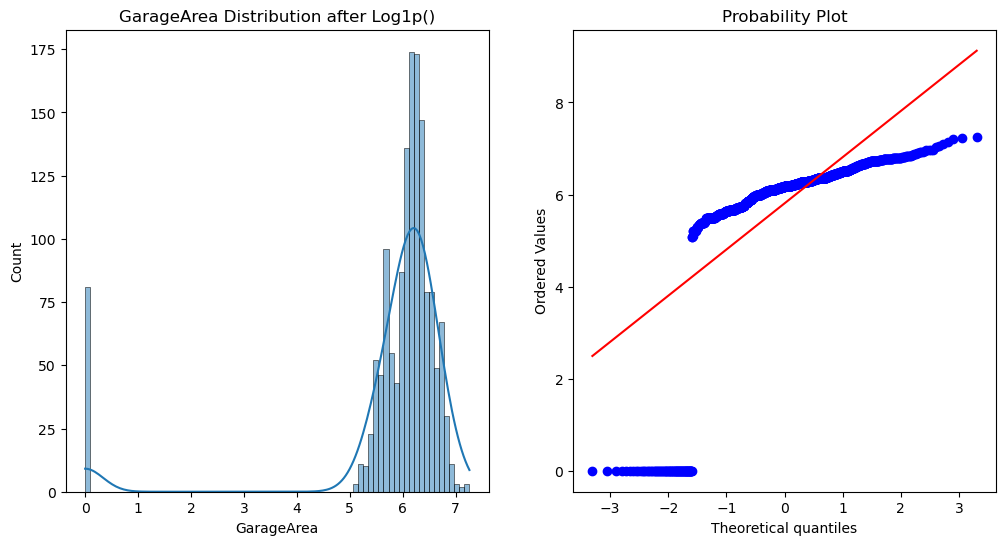

Feature #27: WoodDeckSF
Skewness: 1.541376
Kurtosis: 2.992951


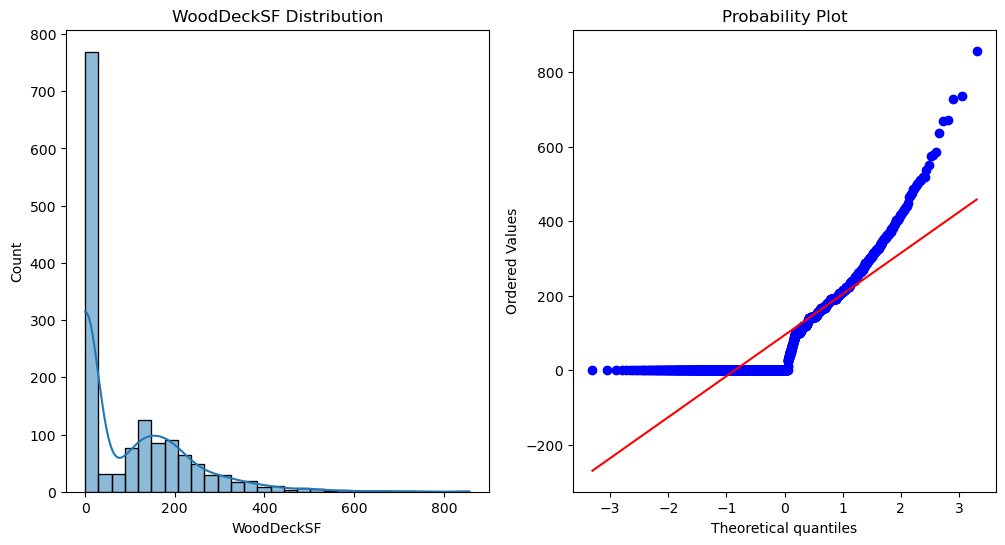

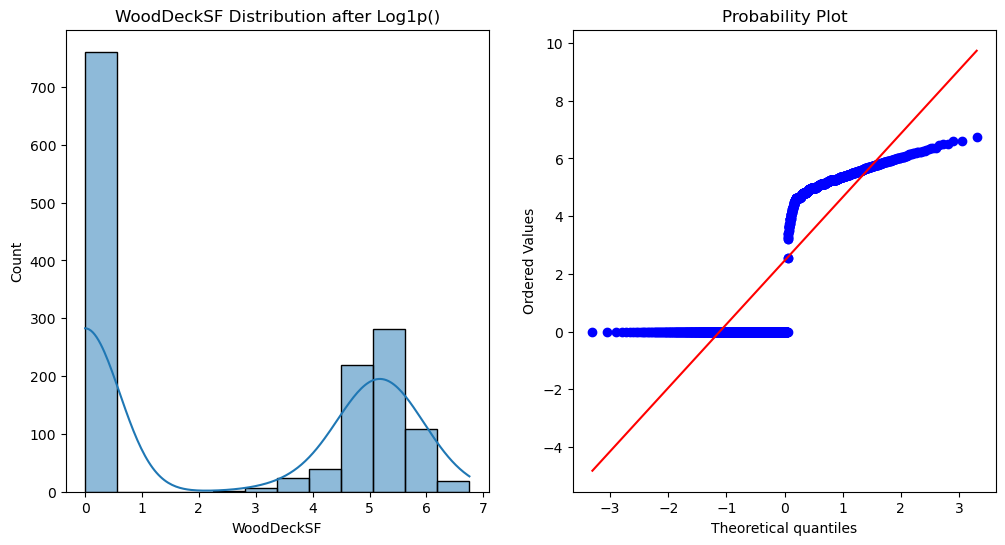

Feature #28: OpenPorchSF
Skewness: 2.364342
Kurtosis: 8.490336


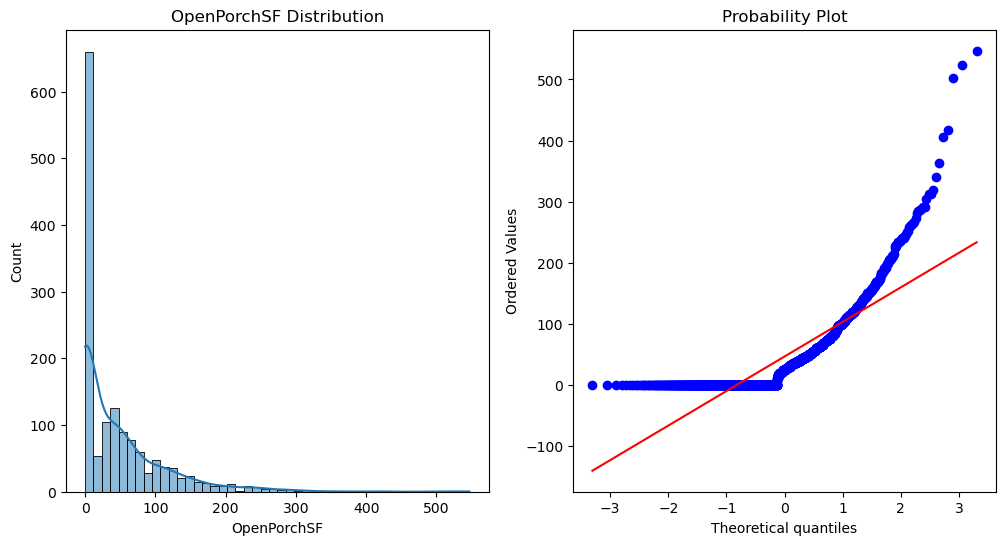

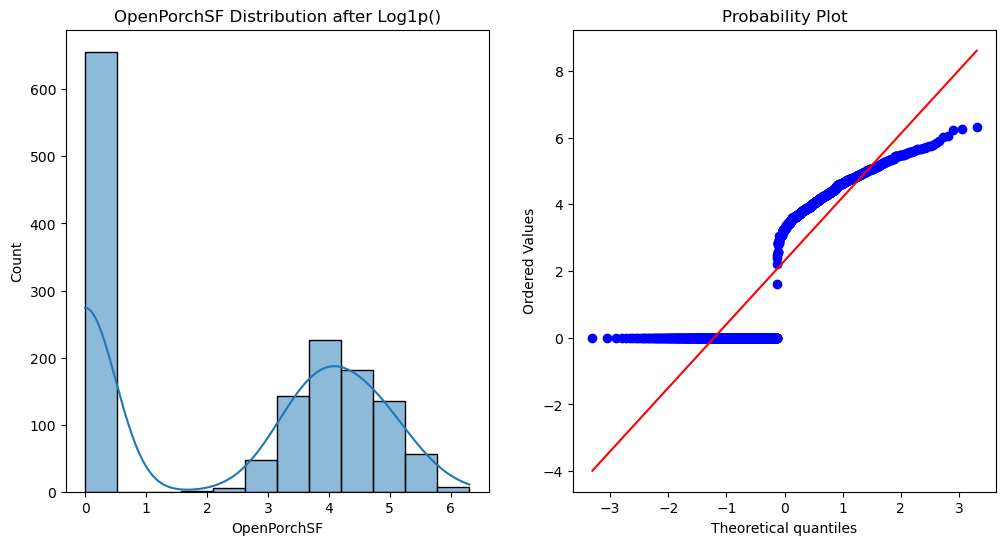

Feature #29: EnclosedPorch
Skewness: 3.089872
Kurtosis: 10.430766


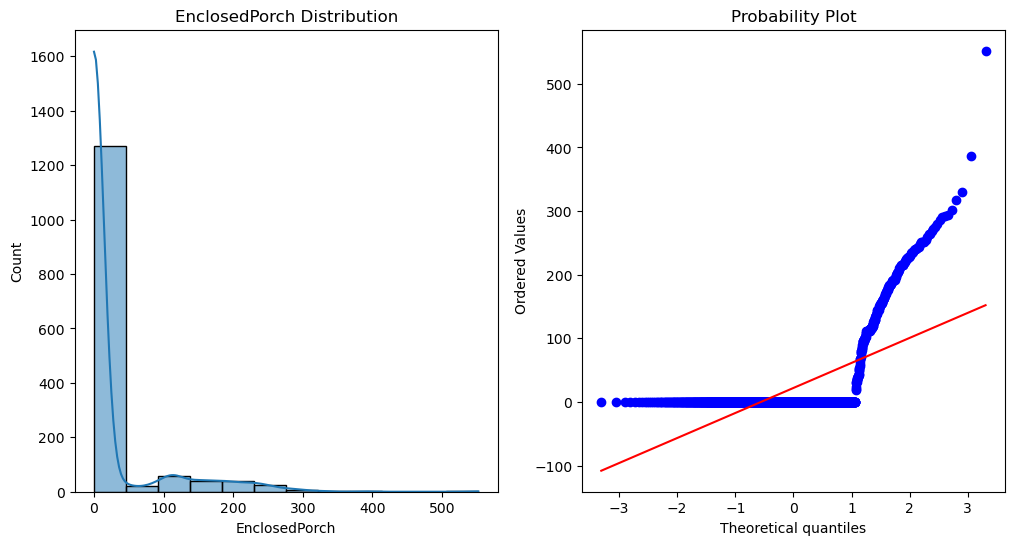

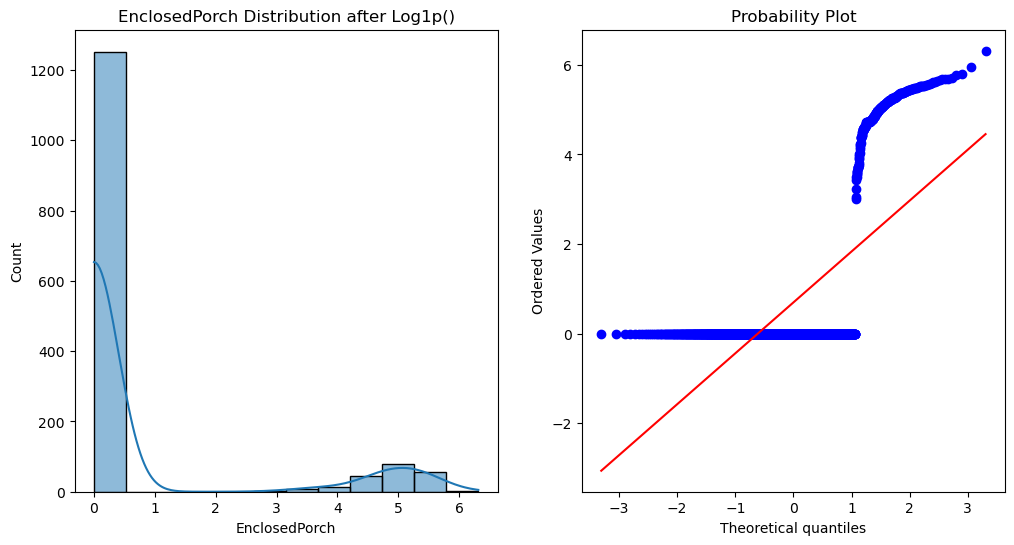

Feature #30: 3SsnPorch
Skewness: 10.304342
Kurtosis: 123.662379


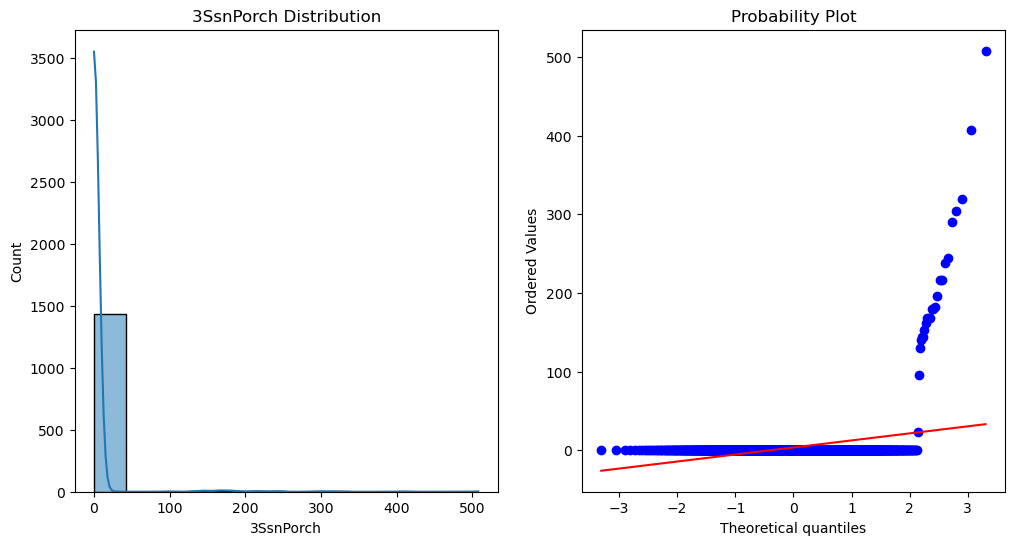

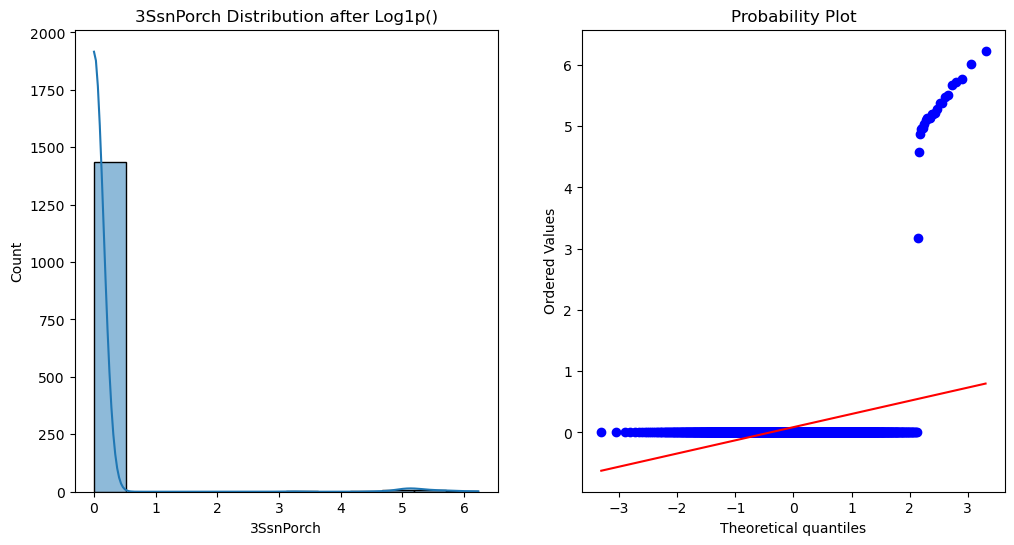

Feature #31: ScreenPorch
Skewness: 4.122214
Kurtosis: 18.439068


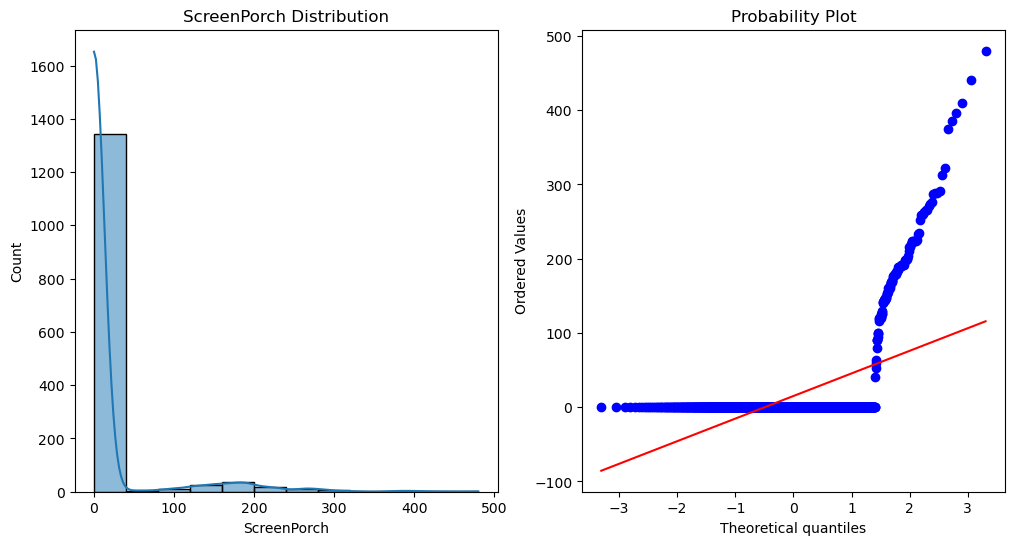

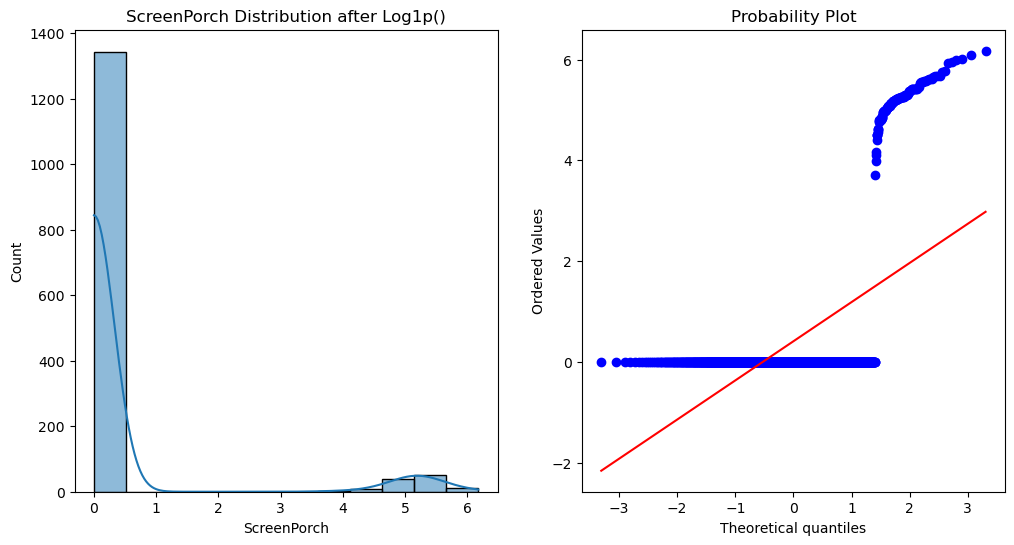

Feature #32: PoolArea
Skewness: 14.828374
Kurtosis: 223.268499


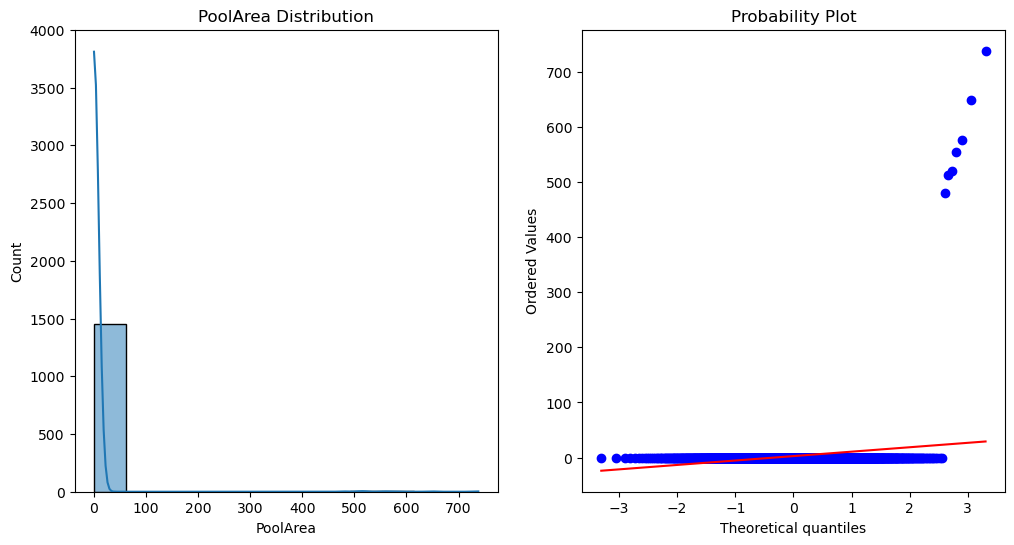

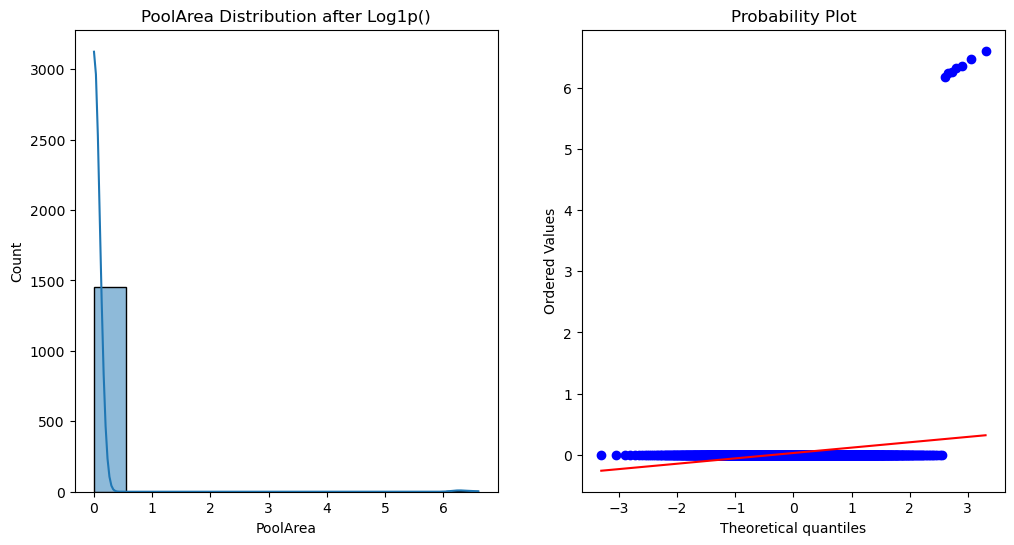

Feature #33: MiscVal
Skewness: 24.476794
Kurtosis: 701.003342


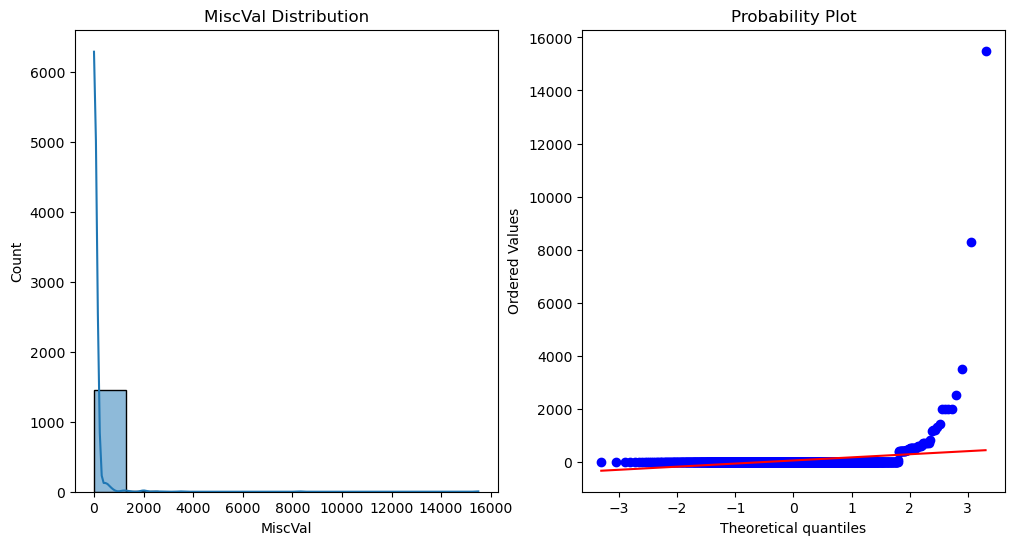

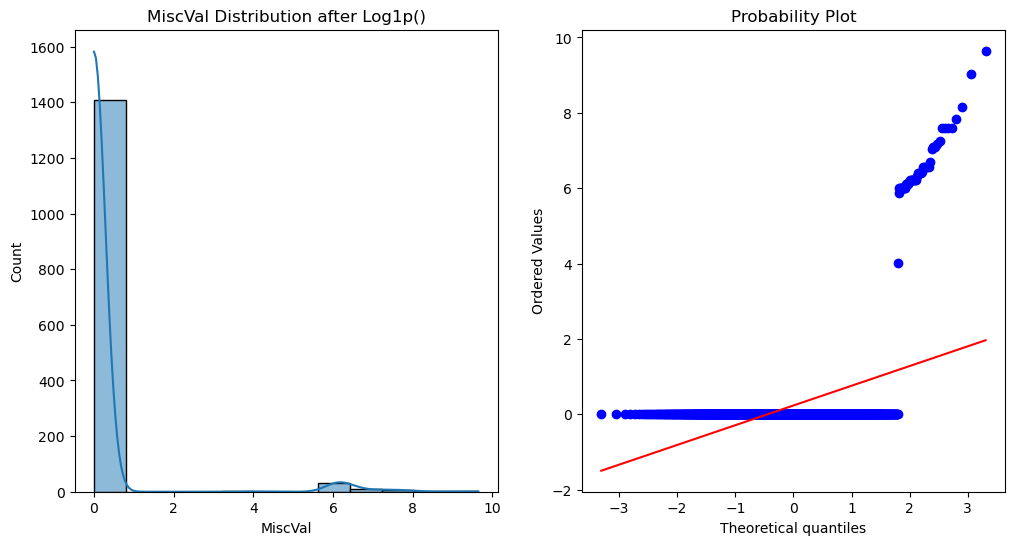

Feature #34: MoSold
Skewness: 0.212053
Kurtosis: -0.404109


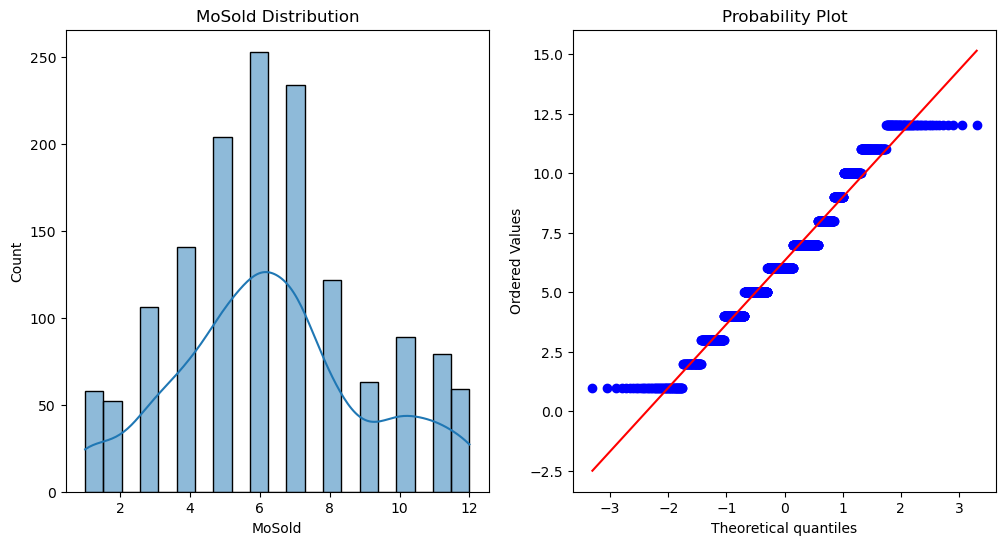

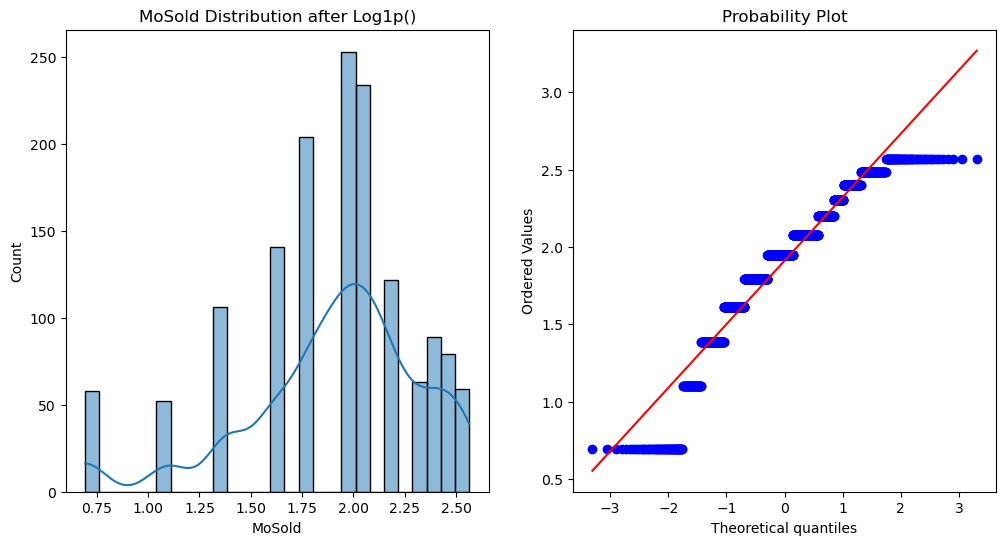

Feature #35: YrSold
Skewness: 0.096269
Kurtosis: -1.190601


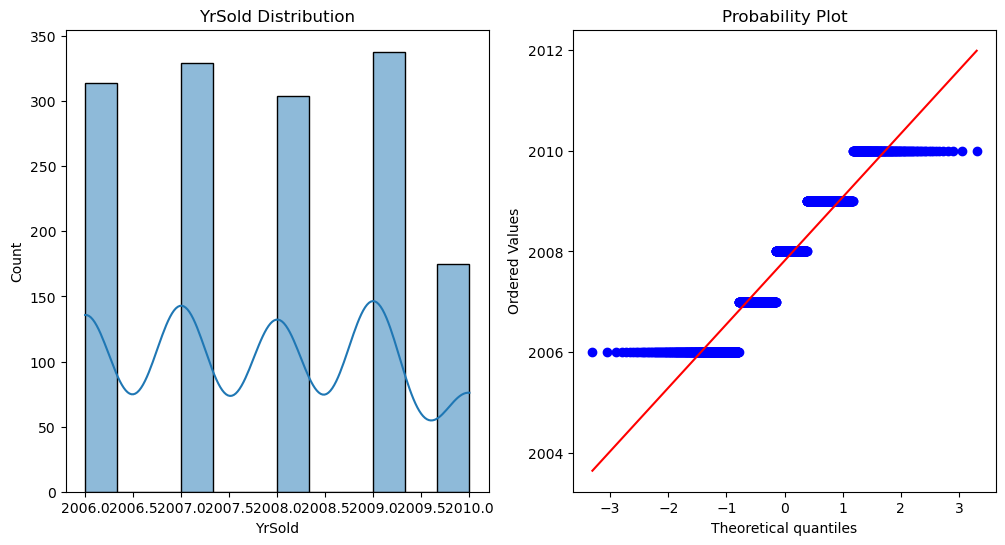

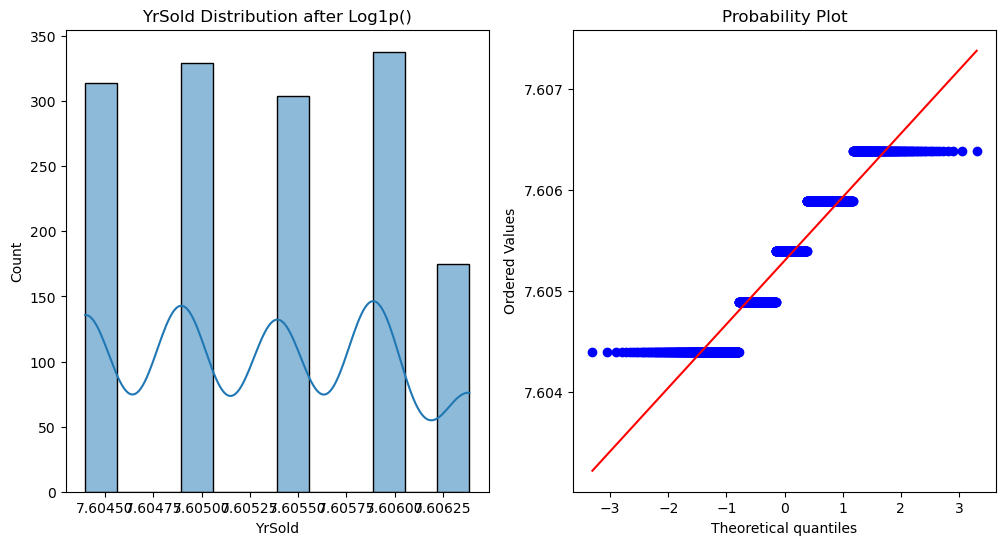

Feature #36: SalePrice
Skewness: 1.882876
Kurtosis: 6.536282


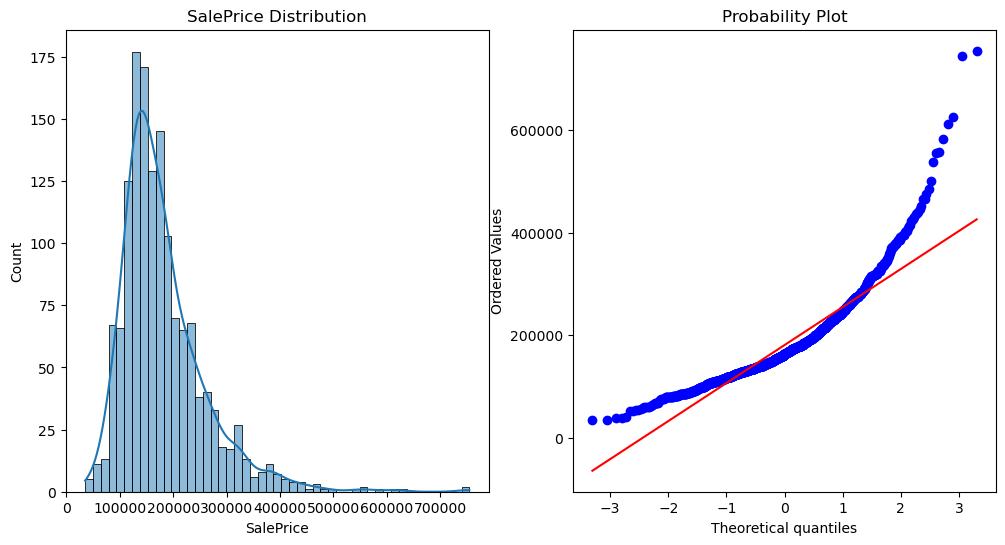

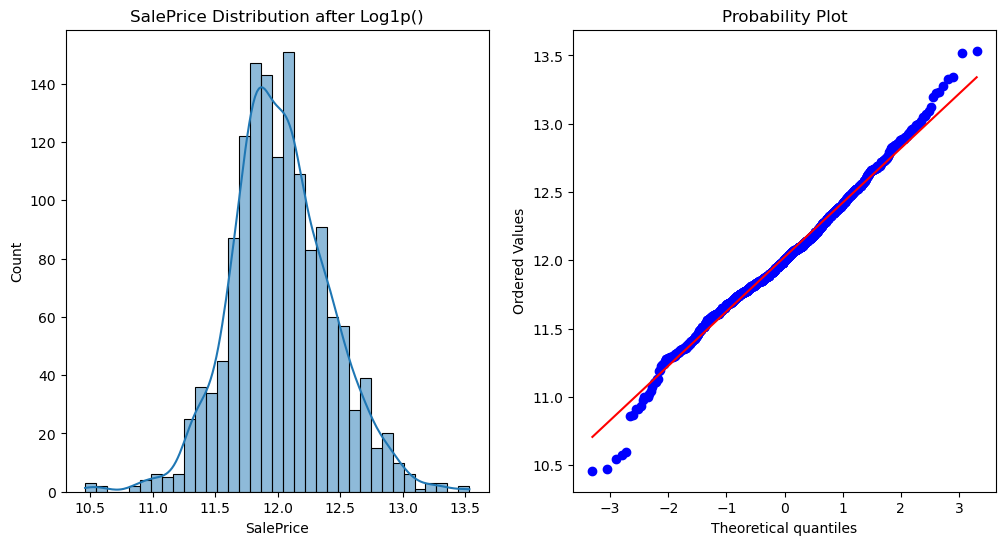

In [210]:
show_all_features()

From the manual analysis of all numerical features I collected:
1. **Outliars**: dictionary with feature name and max cut_off value
2. **Distribution improvement**: Features distribution and skewness of which can be improved with log() (TODO: Use BoxCox transform instead of log as in https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard#Data-Processing)
3. **Numerical categories**: List of categorical features with numerical datatype (whether they shall be kept numerical or encoded as categorical variables - is a question to research)
4. **Zero-mode features**: List of features that has normal distribution combined with huge spike on "zero-value". 
    - This feature can be divided into two features. The first feature is a binary state that has 1 for all non-zero values of original feature. At the same time, the second feature will use mean value of all non-zero entries to fill zeros. That will store information on zero-values and will make one more normally distributed feature.

In [211]:
outliers = {"LotFrontage": 300, "LotArea": 100000,
            "BsmtFinSF1": 5000, "MasVnrArea": 1300,
            "BsmtFinSF2": 1300, "TotalBsmtSF": 5000,
            "1stFlrSF": 4000, "GrLivArea": 5000,
            "OpenPorchSF": 470, "EnclosedPorch": 500,
            "SalePrice": 700000}

apply_log = ["GrLivArea", "1stFlrSF", "MiscVal", "SalePrice"]

numerical_categorical = ["MSSubClass", "OverallQual",
                         "OverallCond", "BsmtFullBath",
                         "BsmtHalfBath", "FullBath",
                         "HalfBath", "BedroomAbvGr",
                         "KitchenAbvGr", "TotRmsAbvGrd",
                         "Fireplaces", "GarageCars",
                         "MoSold", "YrSold"]

make_two_features = ["YearRemodAdd", "MasVnrArea", "BsmtFinSF1",
                     "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
                     "2ndFlrSF", "LowQualFinSF", 
                     "GarageArea", "WoodDeckSF", "OpenPorchSF", 
                     "EnclosedPorch", "3SsnPorch", "ScreenPorch",
                     "PoolArea", "MiscVal"]

## 1. Remove Outliers

I will go through each feature and will store indexes of data points that are outside of my manual max_values for each of given features

In [212]:
outlier_ind = set()

numerical_features = train.select_dtypes(exclude="object").columns
for feature_name, max_value in outliers.items():
    x = train[feature_name]
    x = x[x > max_value]
    outlier_ind.update(list(x.index))

outlier_ind

{197, 249, 297, 313, 322, 335, 495, 583, 691, 706, 934, 1169, 1182, 1298, 1328}

Text(0.5, 1.0, 'Checking one of Features with outliers before filtering')

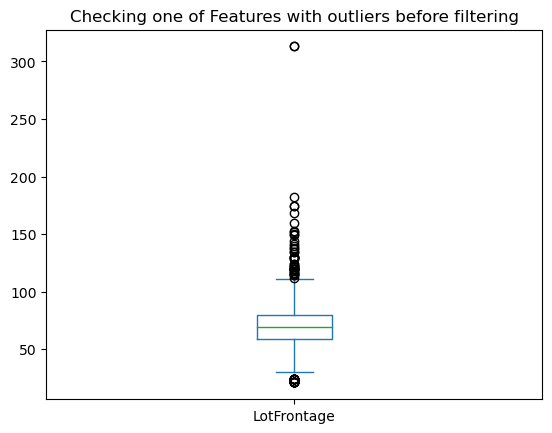

In [213]:
train["LotFrontage"].plot(kind="box")
plt.title("Checking one of Features with outliers before filtering")

In [214]:
train.drop(outlier_ind, inplace=True)

Text(0.5, 1.0, 'Checking one of Features with outliers after filtering')

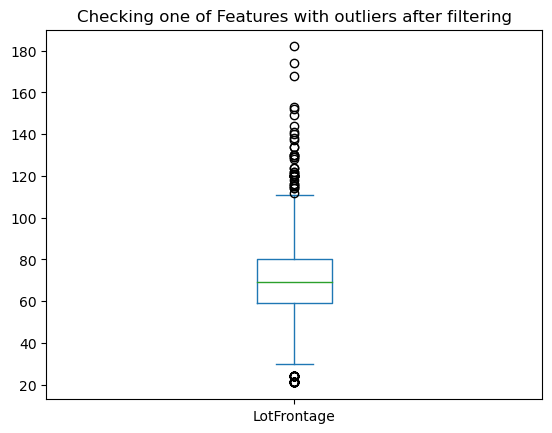

In [215]:
train["LotFrontage"].plot(kind="box")
plt.title("Checking one of Features with outliers after filtering")

In [216]:
train.shape

(1445, 80)

And so, I just dropped 15 samples of 1460

I tried IQR methodology to drop all samples outside of the Q1 and Q3. But in this way I am removing hundreds of samples which only decreases the performance. 

I got information on dropping performance from personal experience and supported it with this discussion:
- https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/discussion/170472

Therefore, the outlier filtering must be done with a lot of causiousness. Perhaps, 15 outliers I found manually is enough for filtering


## 2. Make binary zero-value feature

I am not sure that this technique will improve the performance, so will keep it for experiemnts.

In [217]:
# for feature_name in make_two_features:
#     stats.probplot(train[feature_name], plot=plt);
#     plt.title("Feature: {} before removing mode".format(feature_name))
#     plt.show()
    
#     print("Feature: {} ".format(feature_name))
#     mode_value = train[feature_name].mode().values[0]
#     print("Its mode: ", mode_value)
    
#     new_feature_name = feature_name + "_" + str(mode_value)
#     print("New binary feature: ", new_feature_name)
    
#     x = train[feature_name]
#     ind_of_mode = x[x == mode_value].index  # Index of data entries each value is mode
    
#     # Create new Feature
#     train[new_feature] = 1
#     train.loc[ind_of_mode, new_feature] = 0
    
#     # Replace mode of original feature with mean of rest values
#     ind_of_not_mode = x[x != mode_value].index
    
#     sub_feature = x.loc[ind_of_not_mode]
#     new_mean = sub_feature.mean()
#     train[feature_name].replace(to_replace=mode_value, value=new_mean, inplace=True)
    
#     stats.probplot(train[feature_name], plot=plt);
#     plt.title("Feature: {} after removing mode".format(feature_name))
#     plt.show()

Now, when annoying zero-values became annoying mean-values (not sure it it better now), I can tri add these features to those who are going to be transformed with log()

In [218]:
# for ind, col in enumerate(make_two_features):
#     feature = train[col]
#     print("Feature #{}: {}".format(ind, col))
#     plot_feature_distribution(feature, col)

Notably, not all features can be improved with Log transform

Some of them have too many mode-values and log transform doesn't change anything sufficiantly

In other cases, log transform makes data more sparce

The list of features that could be imroved with the log() transform out of recently-created features are:

In [219]:
# add_to_log_transform = ["TotalBsmtSF", "1stFlrSF", "GarageArea", 
#                         "WoodDeckSF", "OpenPorchSF"]

In [220]:
# apply_log = set(apply_log)
# apply_log.update(add_to_log_transform)
# apply_log

Also, some of features already were in the list as the improvement was clear even before mode-value replacement

## 3. Apply log() transform

In [221]:
for feature_name in apply_log:
    print("Feature: ", feature_name)
    print("Skewness (Before): %f" % train[feature_name].skew())
    print("Kurtosis (Before): %f" % train[feature_name].kurt())
    train[feature_name] = np.log1p(train[feature_name])
    print("Skewness (After): %f" % train[feature_name].skew())
    print("Kurtosis (After): %f" % train[feature_name].kurt())

Feature:  GrLivArea
Skewness (Before): 0.939719
Kurtosis (Before): 1.829232
Skewness (After): -0.099845
Kurtosis (After): 0.070123
Feature:  1stFlrSF
Skewness (Before): 0.950971
Kurtosis (Before): 1.539566
Skewness (After): 0.018654
Kurtosis (After): -0.046612
Feature:  MiscVal
Skewness (Before): 24.541679
Kurtosis (Before): 701.394657
Skewness (After): 5.321430
Kurtosis (After): 27.090352
Feature:  SalePrice
Skewness (Before): 1.528764
Kurtosis (Before): 3.572564
Skewness (After): 0.091349
Kurtosis (After): 0.575784


## 4. Numerical Categories

Found "funny" way of categorization with replacing strings with numbers. Don't believe it is going to work, but worth trying
- https://github.com/jvanelteren/housing/blob/master/2Feature%20Engineering.ipynb 

This section requires personalised approach for each feature

To decide what shall be done with each feature I will refer to its description

The main criteria to decide whther a feture shall be kept as a number or encoded as categorical variable is:
- Decide if hte neighbour values are highly correlated as number. 
    - For example, type "1" and type "2" could mean absolutely different type, while
1 bathroom and 2 bathrooms are describing the quantity of the same thing

Feature Description -> Decision:

- **MSSubClass** is a **type** of dwelling involved in the sale. -> Must be categorised
- **OverallQual** are **Rates** of the overall material and finish of the house. -> Could be a number
- **OverallCond** are **Rates** of the overall condition of the house -> Could be a number
- **BsmtFullBath** is **[number of]** Basement full bathrooms -> Could be a number (or could be combined)
- **BsmtHalfBath** is **[number of]** Basement half bathrooms -> Could be a number (or could be combined)
- **FullBath** is **[number of]** Full bathrooms above grade -> Could be a number (or could be combined)
- **HalfBath** is **[number of]** Half baths above grade -> Could be a number (or could be combined)
- **BedroomAbvGr** is **[number of]** Bedrooms above grade -> Could be a number
- **TotRmsAbvGrd** is **[number of]** Total rooms above grade -> Could be a number 
- **Fireplaces** is **[number of]** Number of fireplaces -> Could be a number 
- **GarageCars** is **Size** of garage in car capacity -> Could be a number 
- **MoSold** is **[number of]** Month Sold (MM) -> Could be a number or category
- **YrSold** is **[number of]** Year Sold (YYYY) -> Could be a number or category

From the list above we defined 1-3 features that could be categorised

In [222]:
num_to_category = ["MSSubClass", "MoSold", "YrSold"]
for ntc in num_to_category:
    train[ntc] = train[ntc].apply(str)
train[num_to_category[0]].info()

<class 'pandas.core.series.Series'>
Int64Index: 1445 entries, 0 to 1459
Series name: MSSubClass
Non-Null Count  Dtype 
--------------  ----- 
1445 non-null   object
dtypes: object(1)
memory usage: 22.6+ KB


# Missing Values

Sources on approaches with Missing Values: 
- https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard 
- https://www.kaggle.com/code/niteshx2/top-50-beginners-stacking-lgb-xgb/notebook#Now-,-we-are-getting-started-with-the-process-of-modelling 
- https://www.kaggle.com/code/jesucristo/1-house-prices-solution-top-1/notebook#EDA

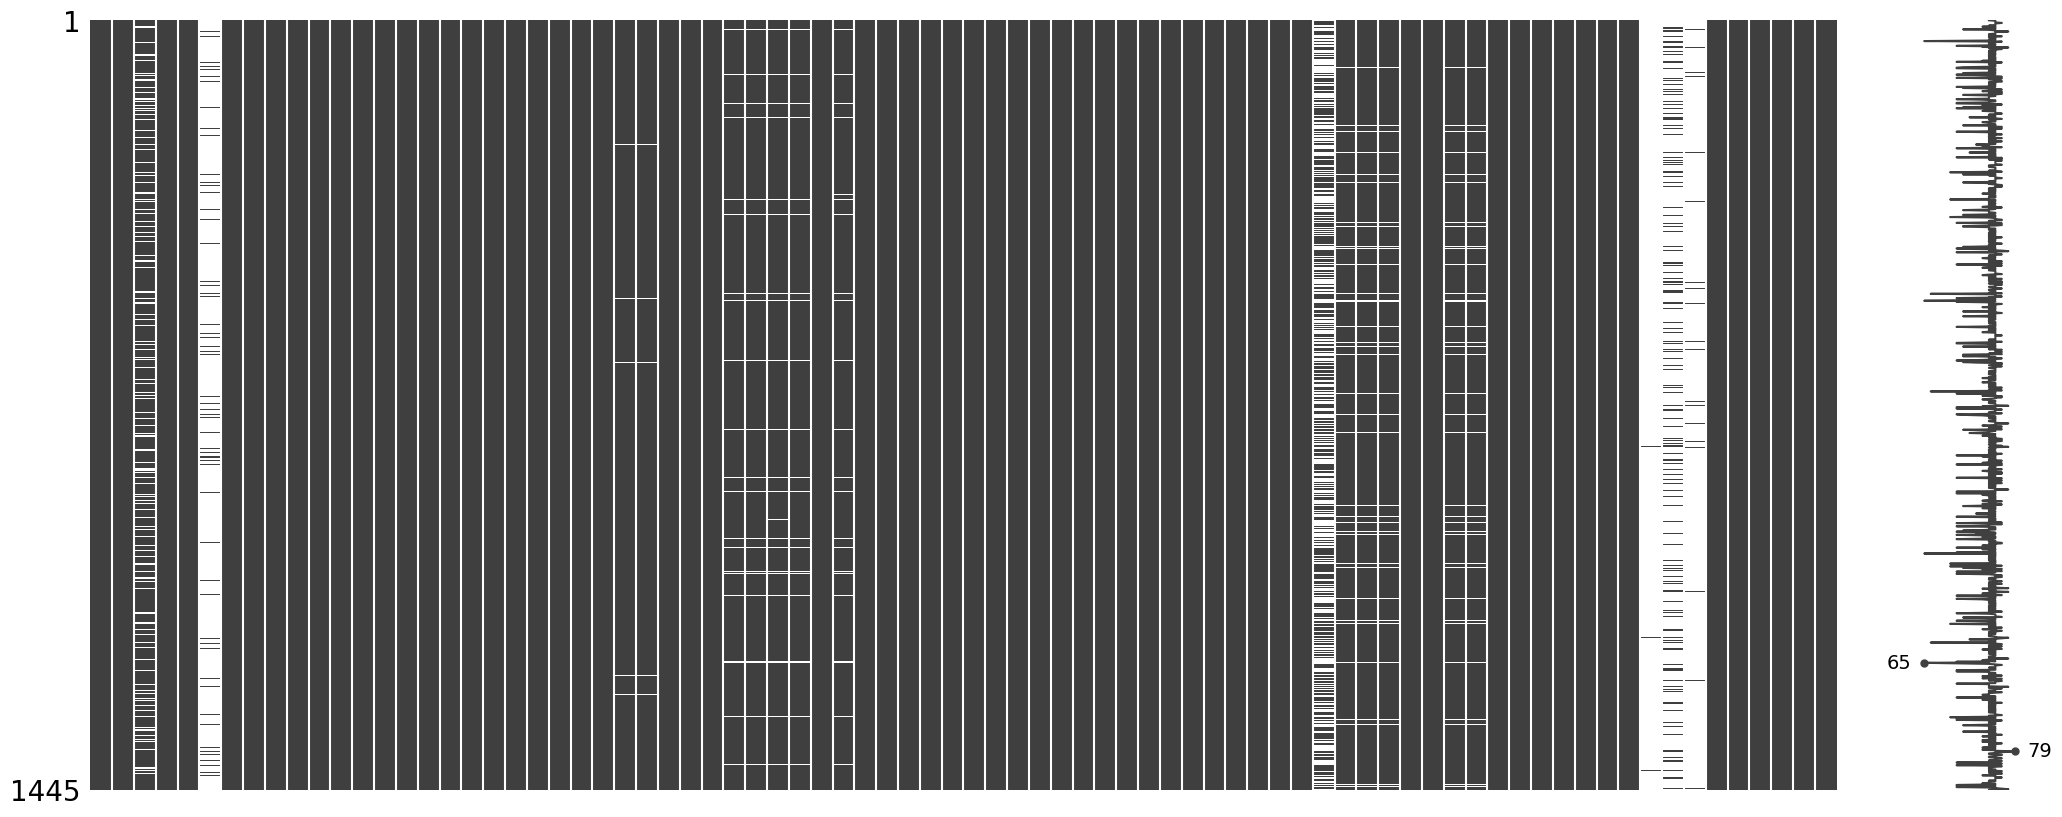

Missing Ratio
PoolQC           99.723183
MiscFeature      96.470588
Alley            93.840830
Fence            80.899654
FireplaceQu      47.681661

In [223]:
import missingno as msno

msno.matrix(train);
plt.show()

all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({"Missing Ratio" :all_data_na})
missing_data.head(5)

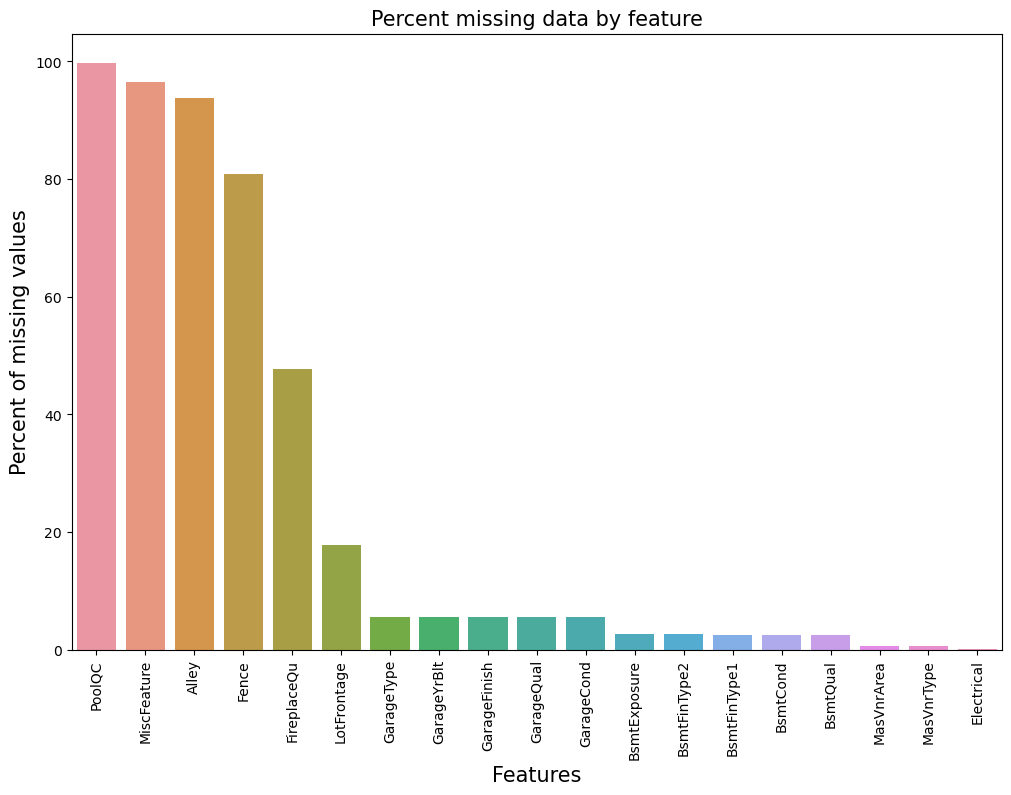

In [224]:
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation=90)
sns.barplot(x=all_data_na.index, y=all_data_na);
plt.xlabel("Features", fontsize=15)
plt.ylabel("Percent of missing values", fontsize=15)
plt.title("Percent missing data by feature", fontsize=15)
plt.show()

On the first glance it is clear that some features has too much data loss and you might want to simply remove them from dataset.

However, data exploration shows that some of them are actually trying to assign specific label with NaN and therefore no data is actualy lost, it is just stored incorrectly

Data Exploration:

- **PoolQC**: data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
- **MiscFeature**: data description says NA means "no misc feature"
- **Alley**: data description says NA means "no alley access"
- **Fence**: data description says NA means "no fence"
- **FireplaceQu**: data description says NA means "no fireplace"
- **LotFrontage**: can fill in missing values by the median LotFrontage of the neighborhood.
- **GarageType**, **GarageFinish**, **GarageQual** and **GarageCond**: Replacing missing data with "No_Garage"
- **GarageYrBlt**, **GarageArea** and **GarageCars**: Replacing missing data with 0 (Since No garage = no cars in such garage.)
- **BsmtFinSF1**, **BsmtFinSF2**, **BsmtUnfSF**, **TotalBsmtSF**, **BsmtFullBath** and **BsmtHalfBath**: Replacing missing data with 0 for having no basement
- **BsmtQual**, **BsmtCond**, **BsmtExposure**, **BsmtFinType1** and **BsmtFinType2**: For all these categorical basement-related features, replacing missing data with 0 as NaN means that there is no basement.
- **MasVnrArea** and **MasVnrType**: NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
- **MSZoning** (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with median ('RL')
- **Utilities**: For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely **drop** it.
- **Electrical**: It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
- **KitchenQual**: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
- **Exterior1st** and **Exterior2nd**: Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
- **SaleType**: Fill in again with mode ("WD")

PS: Each neighbourhood has its own statistical means. So LotFrontage could be filled with smart decision - calculating means for each area separately!

In [225]:
means_lot_frontage = train.groupby("Neighborhood")["LotFrontage"].median()
filled_lot_frontage = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(means_lot_frontage[x.name]))

# print(means_lot_frontage)
# print(list(train.groupby("Neighborhood")["LotFrontage"])[:100])
# print("Na #:", train["LotFrontage"].isna().sum().sum())

In [226]:
# print("Filled feature: ", filled_lot_frontage)
# print("Na #:", filled_lot_frontage.isna().sum().sum())

In [227]:
for col in ("PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"):
	train[col] = train[col].fillna("No_" + col)

for col in ("GarageType", "GarageFinish", "GarageQual", "GarageCond"):
	train[col] = train[col].fillna("No_Garage")
    
for col in ("GarageYrBlt", "GarageArea", "GarageCars"):
	train[col] = train[col].fillna(0)
    
for col in ("BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF","TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"):
	train[col] = train[col].fillna(0)
    
for col in ("BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"):
	train[col] = train[col].fillna("No_" + col)

train_modes_to_fill = {}	# Data For Test Dataset PreProcessing
for col in ("MSZoning", "Electrical", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType"):
    train_modes_to_fill[col] = train[col].mode()[0]
    train[col] = train[col].fillna(train_modes_to_fill[col])
    
means_lot_frontage = train.groupby("Neighborhood")["LotFrontage"].median()
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(means_lot_frontage[x.name]))
    
train.drop(['Utilities'], axis=1, inplace=True)

train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
train["MasVnrType"] = train["MasVnrType"].fillna("None")


Checking for Missing Values

In [228]:
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({"Missing Ratio" :all_data_na})
missing_data.head(5)

Empty DataFrame
Columns: [Missing Ratio]
Index: []

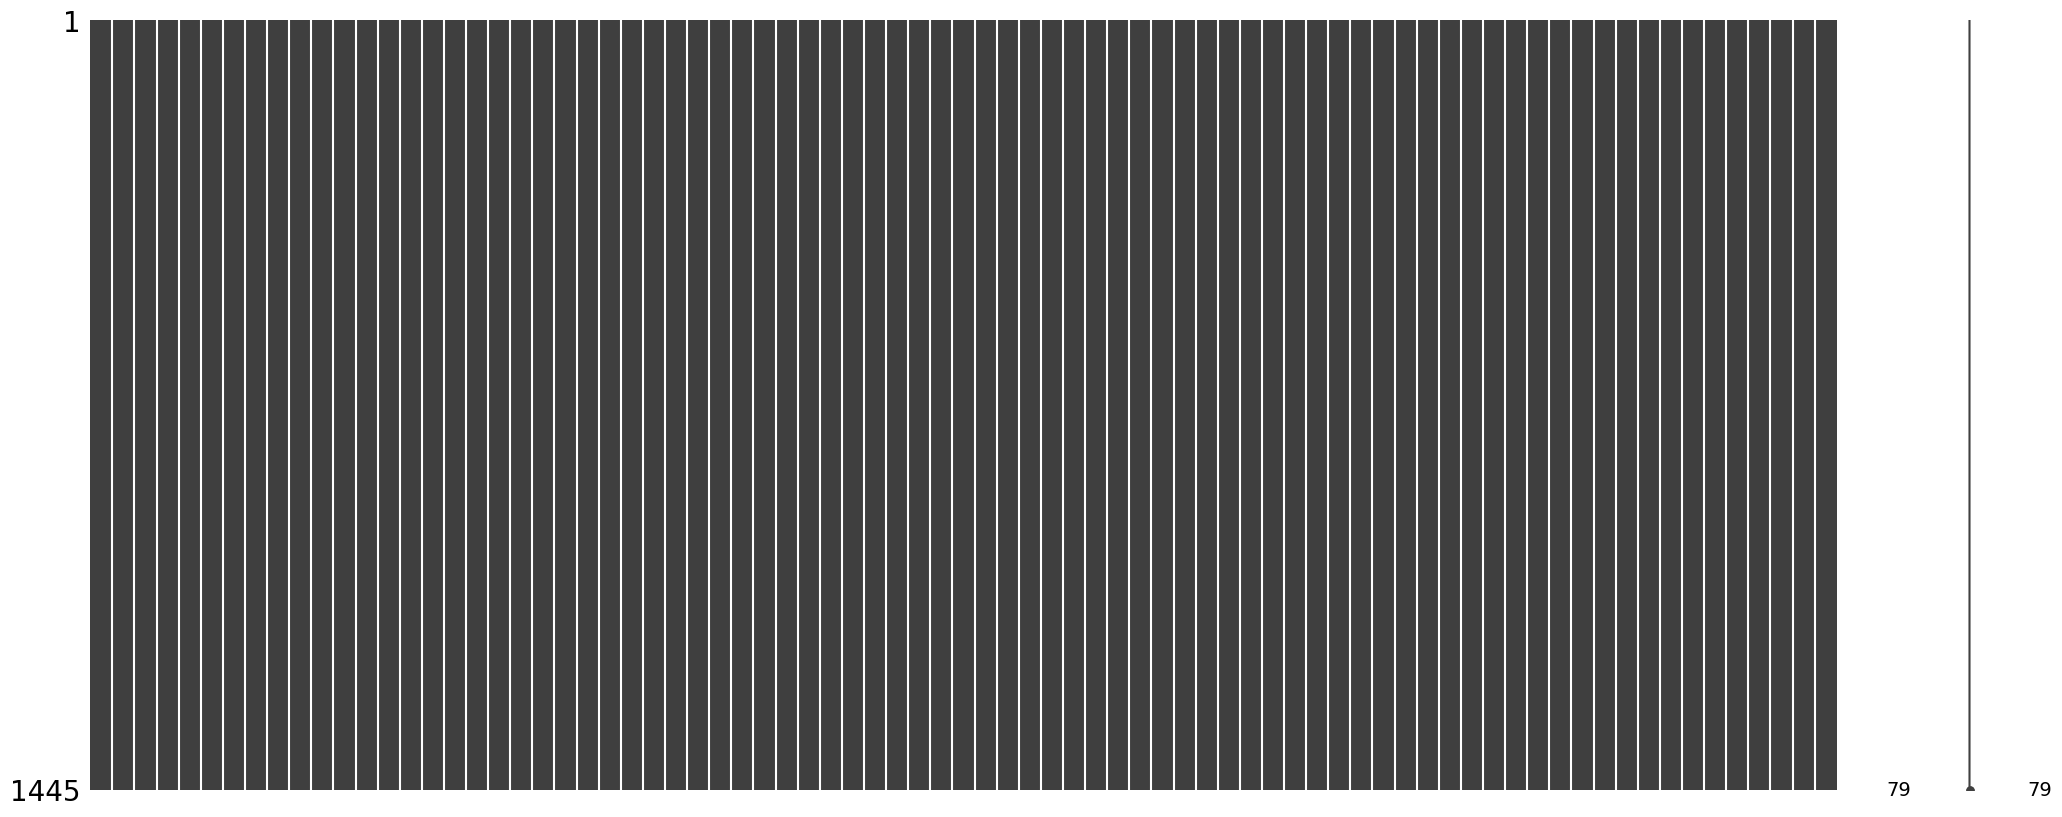

In [229]:
msno.matrix(train);
plt.show()

In [230]:
train.shape

(1445, 79)

## Feature Engineering

sources:
- https://www.kaggle.com/code/jesucristo/1-house-prices-solution-top-1/notebook#EDA 
- https://www.kaggle.com/code/niteshx2/top-50-beginners-stacking-lgb-xgb/notebook#Final-Step-: 

TODO: Add to next BaseModel

In [231]:
# features['YrBltAndRemod']=features['YearBuilt']+features['YearRemodAdd']
# features['TotalSF']=features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

# features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
#                                  features['1stFlrSF'] + features['2ndFlrSF'])

# features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
#                                features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))

# features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
#                               features['EnclosedPorch'] + features['ScreenPorch'] +
#                               features['WoodDeckSF'])

In [232]:
# features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
# features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
# features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
# features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

OR from 
- https://www.kaggle.com/code/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition 

In [233]:
# all_features['BsmtFinType1_Unf'] = 1*(all_features['BsmtFinType1'] == 'Unf')
# all_features['HasWoodDeck'] = (all_features['WoodDeckSF'] == 0) * 1
# all_features['HasOpenPorch'] = (all_features['OpenPorchSF'] == 0) * 1
# all_features['HasEnclosedPorch'] = (all_features['EnclosedPorch'] == 0) * 1
# all_features['Has3SsnPorch'] = (all_features['3SsnPorch'] == 0) * 1
# all_features['HasScreenPorch'] = (all_features['ScreenPorch'] == 0) * 1
# all_features['YearsSinceRemodel'] = all_features['YrSold'].astype(int) - all_features['YearRemodAdd'].astype(int)
# all_features['Total_Home_Quality'] = all_features['OverallQual'] + all_features['OverallCond']
# all_features = all_features.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
# all_features['TotalSF'] = all_features['TotalBsmtSF'] + all_features['1stFlrSF'] + all_features['2ndFlrSF']
# all_features['YrBltAndRemod'] = all_features['YearBuilt'] + all_features['YearRemodAdd']

# all_features['Total_sqr_footage'] = (all_features['BsmtFinSF1'] + all_features['BsmtFinSF2'] +
#                                  all_features['1stFlrSF'] + all_features['2ndFlrSF'])
# all_features['Total_Bathrooms'] = (all_features['FullBath'] + (0.5 * all_features['HalfBath']) +
#                                all_features['BsmtFullBath'] + (0.5 * all_features['BsmtHalfBath']))
# all_features['Total_porch_sf'] = (all_features['OpenPorchSF'] + all_features['3SsnPorch'] +
#                               all_features['EnclosedPorch'] + all_features['ScreenPorch'] +
#                               all_features['WoodDeckSF'])
# all_features['TotalBsmtSF'] = all_features['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
# all_features['2ndFlrSF'] = all_features['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
# all_features['GarageArea'] = all_features['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
# all_features['GarageCars'] = all_features['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
# all_features['LotFrontage'] = all_features['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
# all_features['MasVnrArea'] = all_features['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
# all_features['BsmtFinSF1'] = all_features['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)

# all_features['haspool'] = all_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
# all_features['has2ndfloor'] = all_features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# all_features['hasgarage'] = all_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
# all_features['hasbsmt'] = all_features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
# all_features['hasfireplace'] = all_features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [234]:
# sns.pairplot(train, size = 2.5);
# plt.show()

# Category Encoding

Some people use Lable Encoding:
- https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard
- https://github.com/jvanelteren/housing/blob/master/2Feature%20Engineering.ipynb 

The lable encoding shall be checked in next basemodel

Here I will perform OneHotEncoding

However, many works how INCORRECT APPROACH where they combine training and testing data together and apply preprocessing, including encoding, to the whole dataset. That is inappropriate, and can be reffered to issue called "data leak". The problems are: you cannot use testing data to get information for training (can't use test data for statistical values to replace NaN of training dataset) and cannot update number of categories from test data to be applied on whole dataset! In real case scenario only training dataset will be given and test is an actual application of the model to real world. Therefore, we must rely on training dataset and prepare pipeline for new-comming test dataset. Next works do that INCORRECTLY:
- https://www.kaggle.com/code/niteshx2/top-50-beginners-stacking-lgb-xgb/notebook#Final-Step-:
- https://www.kaggle.com/code/jesucristo/1-house-prices-solution-top-1/notebook#EDA
- https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard#Data-Processing
- https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python#4.-Missing-data 
- https://www.kaggle.com/code/apapiu/regularized-linear-models
- https://www.kaggle.com/code/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition

That is one of the reasons top-leaders (Top 1%, etc) are doing that. The infer the test data and get better performance on testing set. But that is an incorrect approach which is impossible to replicate in the real world scenario

Therefore, here I use Encoder "trained" on training data and used to transform test and training data. The "ignor" parameter will ignore any new categories that are not present in training but appear in test set.


In [235]:
train_categorical = train.select_dtypes(include="object")
train_numerical = train.select_dtypes(exclude="object")

assert train_numerical.isna().sum().sum() == 0
assert train_categorical.isna().sum().sum() == 0
assert train_categorical.shape[1] + train_numerical.shape[1] == train.shape[1]

train_numerical.shape, train_numerical.shape, train.shape

((1445, 34), (1445, 34), (1445, 79))

In [236]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(train_categorical)

encoded_categories = pd.DataFrame(ohe.transform(train_categorical).toarray(), 
                                  columns=list(ohe.get_feature_names_out()),
                                  index=train_categorical.index, 
                                  dtype=int)
encoded_categories.head()

MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0              0              0              0              0              0   
1              1              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_60  ...  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0              1  ...               0             0             0   
1              0  ...               0             0             0   
2              1  ...               0             0             0   
3              0  ...               0             0             0   
4              1  ...               0             0             0   

   SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0            1                      0                      0   
1            1                      0                      0   
2            1                      0                      0   
3            1                      1                      0   
4            1                      0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 293 columns]

In [237]:
train = pd.concat([train_numerical, encoded_categories], axis=1)
train.shape

(1445, 327)

In [238]:
train.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw  \
0       196.0         706           0        150  ...               0   
1         0.0         978           0        284  ...               0   
2       162.0         486           0        434  ...               0   
3         0.0         216           0        540  ...               0   
4       350.0         655           0        490  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      1   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 327 columns]

# Data Separation

In [239]:
y = train["SalePrice"]
X = train.drop(["SalePrice"], axis=1)

# Scaling

In [240]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = pd.DataFrame(scaler.transform(X))

In [241]:
X.head()

0         1         2         3         4         5         6    \
0 -0.227099 -0.288453  0.670197 -0.516412  1.050112  0.879635  0.563501   
1  0.517980 -0.075489 -0.061249  2.184004  0.154199 -0.427953 -0.587910   
2 -0.078083  0.230067  0.670197 -0.516412  0.983748  0.831206  0.363767   
3 -0.475458 -0.084749  0.670197 -0.516412 -1.869903 -0.718528 -0.587910   
4  0.716668  0.787476  1.401643 -0.516412  0.950567  0.734347  1.468182   

        7         8         9    ...       316       317       318       319  \
0  0.626420 -0.289385 -0.946224  ... -0.058926 -0.302307 -0.045612  0.391449   
1  1.256810 -0.289385 -0.643217  ... -0.058926 -0.302307 -0.045612  0.391449   
2  0.116546 -0.289385 -0.304030  ... -0.058926 -0.302307 -0.045612  0.391449   
3 -0.509209 -0.289385 -0.064338  ... -0.058926 -0.302307 -0.045612  0.391449   
4  0.508222 -0.289385 -0.177401  ... -0.058926 -0.302307 -0.045612  0.391449   

        320       321      322      323       324       325  
0 -0.269730 -0.052686 -0.09151 -0.11847  0.466213 -0.306379  
1 -0.269730 -0.052686 -0.09151 -0.11847  0.466213 -0.306379  
2 -0.269730 -0.052686 -0.09151 -0.11847  0.466213 -0.306379  
3  3.707411 -0.052686 -0.09151 -0.11847 -2.144942 -0.306379  
4 -0.269730 -0.052686 -0.09151 -0.11847  0.466213 -0.306379  

[5 rows x 326 columns]

In [242]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1445, dtype: float64

In [243]:
X.shape, y.shape

((1445, 326), (1445,))

# Modeling

Inspiration:
- https://www.kaggle.com/code/jesucristo/1-house-prices-solution-top-1/notebook#Models 
- https://www.kaggle.com/code/niteshx2/top-50-beginners-stacking-lgb-xgb/notebook#Now-,-we-are-getting-started-with-the-process-of-modelling 

In [244]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from datetime import datetime
import numpy as np

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X, y=y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [245]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [246]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=int(1e5), alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=int(1e5), alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [247]:
gbr = GradientBoostingRegressor(
    n_estimators=3000, 
    learning_rate=0.05,
    max_depth=4, 
    max_features='sqrt', 
    min_samples_leaf=15, 
    min_samples_split=10, 
    loss='huber', 
    random_state =42
) 

In [248]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [249]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [250]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [251]:
score = cv_rmse(ridge)
score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

LASSO: 0.1239 (0.0190)
 2023-04-11 16:17:03.848915
elastic net: 0.1244 (0.0189)
 2023-04-11 16:17:44.966095
SVR: 0.1243 (0.0192)
 2023-04-11 16:17:51.019654
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warni

In [252]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Ridge')
ridge_model_full_data = ridge.fit(X, y)

print('Svr')
svr_model_full_data = svr.fit(X, y)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

START Fit
stack_gen
[16:24:14] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[16:24:20] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[16:24:27] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[16:24:35] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[16:24:42] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: fe

In [253]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

In [254]:
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

RMSLE score on train data:
0.05390781791409101


# Submission

Now I repeat the same PreProcessing process as I did for Training Set

**But**, I must **only** use statistical data and scalers trained on training set!

In [255]:
test = pd.read_csv("./dataset/test.csv")
test.drop(['Id'], axis=1, inplace=True)

# Distribution Normalisation
for feature_name in apply_log:
    print("Feature: ", feature_name)
    if feature_name in test.columns:
        test[feature_name] = np.log1p(test[feature_name])
        print("Transform is applied!")
        
# Transforming fake numerical features to categorical features
for ntc in num_to_category:
    test[ntc] = test[ntc].apply(str)
    
# Missing Values
all_data_na = (test.isnull().sum() / len(test)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({"Missing Ratio" :all_data_na})
missing_data.head(5)

Feature:  GrLivArea
Transform is applied!
Feature:  1stFlrSF
Transform is applied!
Feature:  MiscVal
Transform is applied!
Feature:  SalePrice


Missing Ratio
PoolQC           99.794380
MiscFeature      96.504455
Alley            92.666210
Fence            80.123372
FireplaceQu      50.034270

In [256]:
# Missing Values
for col in ("PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"):
    test[col] = test[col].fillna("No_" + col)

for col in ("GarageType", "GarageFinish", "GarageQual", "GarageCond"):
    test[col] = test[col].fillna("No_Garage")
   
for col in ("GarageYrBlt", "GarageArea", "GarageCars"):
    test[col] = test[col].fillna(0)
   
for col in ("BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF","TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"):
    test[col] = test[col].fillna(0)
   
for col in ("BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"):
    test[col] = test[col].fillna("No_" + col)

for col in ("MSZoning", "Electrical", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType"):
    test[col] = test[col].fillna(train_modes_to_fill[col])
   
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(means_lot_frontage[x.name]))
test.drop(['Utilities'], axis=1, inplace=True)

test["MasVnrArea"] = test["MasVnrArea"].fillna(0)
test["MasVnrType"] = test["MasVnrType"].fillna("None")

all_data_na = (test.isnull().sum() / len(test)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({"Missing Ratio" :all_data_na})
missing_data.head(5)

Missing Ratio
Functional        0.13708

In [257]:
# Encoding Categorical features
test_categorical = test.select_dtypes(include="object")
test_numerical = test.select_dtypes(exclude="object")

encoded_categories = pd.DataFrame(ohe.transform(test_categorical).toarray(), 
                                  columns=list(ohe.get_feature_names_out()),
                                  index=test_categorical.index, 
                                  dtype=int)
encoded_categories.head()

test = pd.concat([test_numerical, encoded_categories], axis=1)
test.shape

(1459, 326)

In [258]:
# Scaling
X_test = pd.DataFrame(scaler.transform(test))
X_test.head()

0         1         2         3         4         5         6    \
0  0.517980  0.298956 -0.792695  0.383727 -0.343531 -1.154391 -0.587910   
1  0.567652  0.788772 -0.061249  0.383727 -0.443077 -1.299678  0.046541   
2  0.219949  0.707846 -0.792695 -0.516412  0.851021  0.637489 -0.587910   
3  0.418636 -0.005489 -0.061249  0.383727  0.884203  0.637489 -0.470419   
4 -1.319881 -0.926417  1.401643 -0.516412  0.685111  0.346914 -0.587910   

        7         8         9    ...       316       317       318       319  \
0  0.074829  0.632224 -0.674875  ... -0.058926 -0.302307 -0.045612  0.391449   
1  1.129342 -0.289385 -0.367345  ... -0.058926 -0.302307 -0.045612  0.391449   
2  0.823417 -0.289385 -0.975620  ... -0.058926 -0.302307 -0.045612  0.391449   
3  0.385389 -0.289385 -0.552767  ... -0.058926 -0.302307 -0.045612  0.391449   
4 -0.400281 -0.289385  1.014276  ... -0.058926 -0.302307 -0.045612  0.391449   

       320       321      322      323       324       325  
0 -0.26973 -0.052686 -0.09151 -0.11847  0.466213 -0.306379  
1 -0.26973 -0.052686 -0.09151 -0.11847  0.466213 -0.306379  
2 -0.26973 -0.052686 -0.09151 -0.11847  0.466213 -0.306379  
3 -0.26973 -0.052686 -0.09151 -0.11847  0.466213 -0.306379  
4 -0.26973 -0.052686 -0.09151 -0.11847  0.466213 -0.306379  

[5 rows x 326 columns]

In [259]:
# Predicting Test Set
y_hat = np.floor(np.expm1(blend_models_predict(X_test)))
y_hat

array([123706., 164165., 187183., ..., 166623., 114985., 214798.])

In [260]:
submission = pd.read_csv("./dataset/sample_submission.csv")
submission.iloc[:,1] = y_hat
submission.head()

Id  SalePrice
0  1461   123706.0
1  1462   164165.0
2  1463   187183.0
3  1464   202988.0
4  1465   187886.0

In [262]:
my_submission = pd.DataFrame({'Id': submission.Id, 'SalePrice': y_hat})
my_submission.to_csv('submission_BL7.csv', index=False)

Final Score: 0.12297